#Importing libraries and reading the dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans, DBSCAN

!pip install --quiet optuna

import optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 5.8 MB/s eta 0:00:00


In [ ]:
CC_Dataset = pd.read_csv("/content/CC GENERAL.csv")
print(CC_Dataset.shape)
CC_Dataset.head()

(8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
CC_Dataset.describe()

#Pre-Processing

####Removing the ID column

In [ ]:
CC_Dataset.drop(['CUST_ID'], axis=1, inplace=True)

####Checking for duplicate rows

In [ ]:
#Checking for duplicate rows

duplicate_rows = CC_Dataset[CC_Dataset.duplicated()]
print(duplicate_rows.shape)

(0, 17)


####Processing null values

######Visualization

In [ ]:
CC_Dataset.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
CC_Dataset["CREDIT_LIMIT"].describe()

count     8949.000000
mean      4494.449450
std       3638.815725
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

In [ ]:
CC_Dataset["CREDIT_LIMIT"].mean()

4494.449450364621

In [ ]:
CC_Dataset["CREDIT_LIMIT"].mode()

0    3000.0
Name: CREDIT_LIMIT, dtype: float64

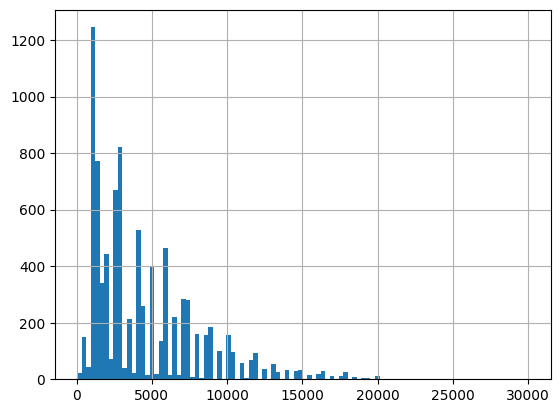

In [ ]:
CC_Dataset["CREDIT_LIMIT"].hist(bins=100)
plt.show()

In [ ]:
CC_Dataset["MINIMUM_PAYMENTS"].describe()

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [ ]:
CC_Dataset["MINIMUM_PAYMENTS"].mean()

864.2065423050828

In [ ]:
CC_Dataset["MINIMUM_PAYMENTS"].mode()

0    299.351881
Name: MINIMUM_PAYMENTS, dtype: float64

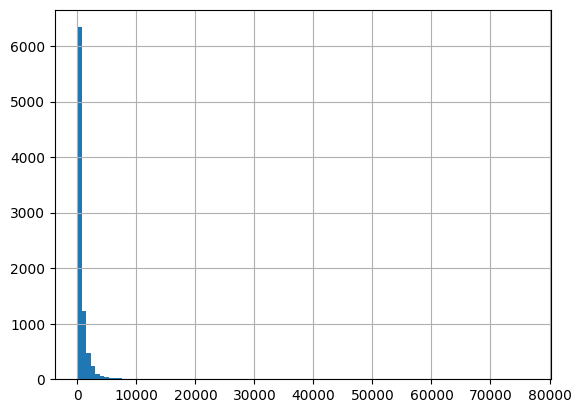

In [ ]:
CC_Dataset["MINIMUM_PAYMENTS"].hist(bins=100)
plt.show()

######Processing null values

In [ ]:
CC_Dataset['CREDIT_LIMIT'] = CC_Dataset['CREDIT_LIMIT'].fillna(CC_Dataset['CREDIT_LIMIT'].mode()[0])

CC_Dataset['MINIMUM_PAYMENTS'] = CC_Dataset['MINIMUM_PAYMENTS'].fillna(CC_Dataset['MINIMUM_PAYMENTS'].mode()[0])

In [ ]:
CC_Dataset.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

####Checking for outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7a10c3424fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a10c3427880>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a10c34271c0>,
 'medians': [<matplotlib.lines.Line2D at 0x7a10c3427dc0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7a10c325c0a0>,
 'means': []}

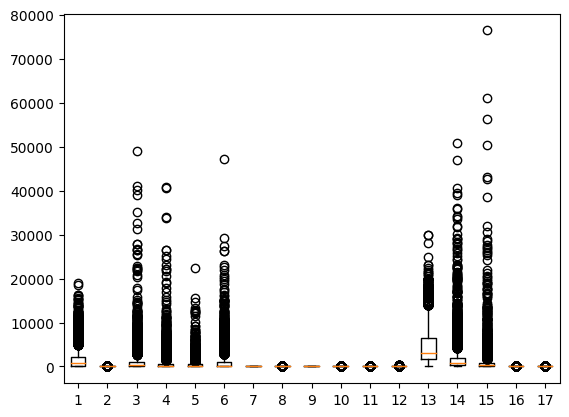

In [ ]:
import seaborn as sns
plt.boxplot(CC_Dataset)

<Axes: ylabel='BALANCE'>

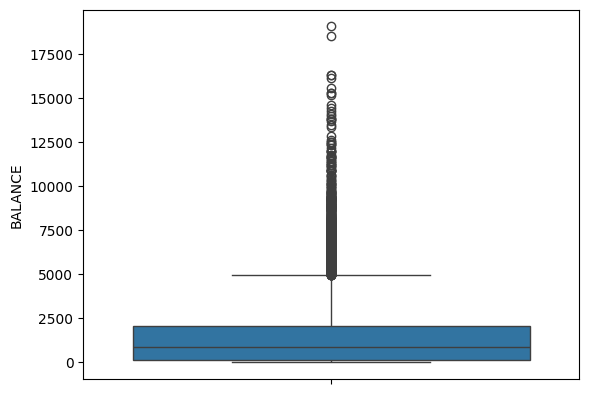

In [ ]:
sns.boxplot(CC_Dataset['BALANCE'])

In [ ]:
CC_Dataset[CC_Dataset['BALANCE']> 4500].shape

(829, 17)

<Axes: ylabel='BALANCE_FREQUENCY'>

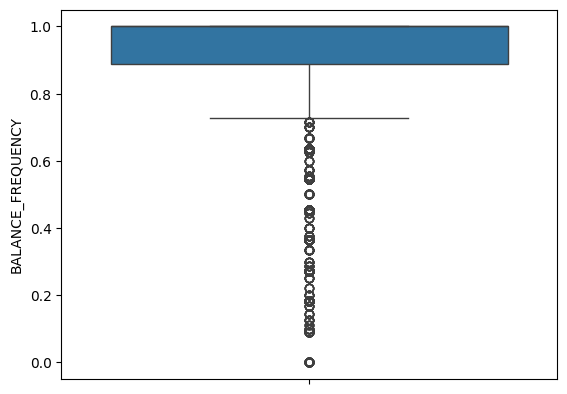

In [ ]:
sns.boxplot(CC_Dataset['BALANCE_FREQUENCY'])

In [ ]:
CC_Dataset[CC_Dataset['BALANCE_FREQUENCY']< 0.45].shape

(742, 17)

<Axes: ylabel='PURCHASES'>

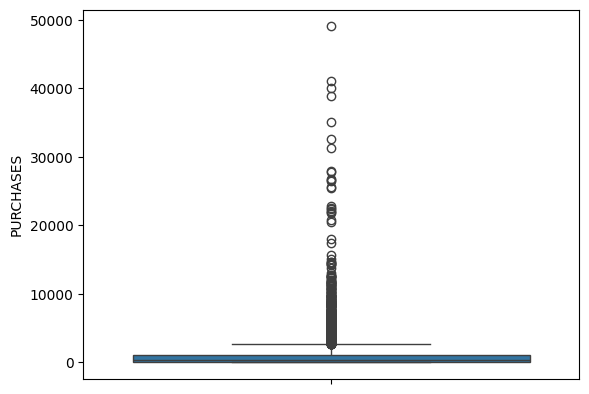

In [ ]:
sns.boxplot(CC_Dataset['PURCHASES'])

In [ ]:
CC_Dataset[CC_Dataset['PURCHASES']> 2700].shape

(814, 17)

<Axes: ylabel='ONEOFF_PURCHASES'>

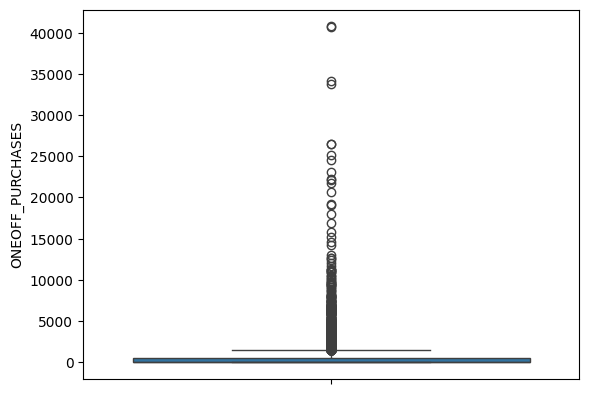

In [ ]:
sns.boxplot(CC_Dataset['ONEOFF_PURCHASES'])

In [ ]:
CC_Dataset[CC_Dataset['ONEOFF_PURCHASES']> 1700].shape

(828, 17)

<Axes: ylabel='INSTALLMENTS_PURCHASES'>

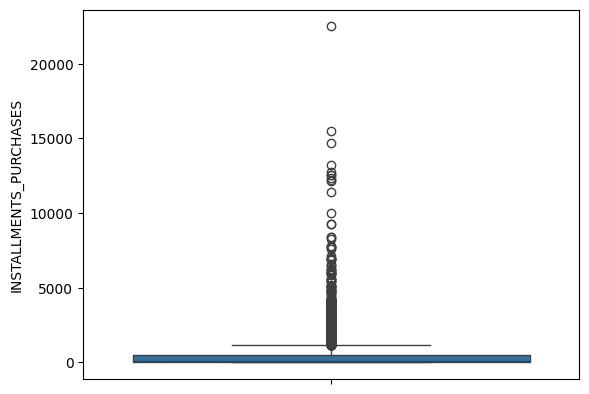

In [ ]:
sns.boxplot(CC_Dataset['INSTALLMENTS_PURCHASES'])

In [ ]:
CC_Dataset[CC_Dataset['INSTALLMENTS_PURCHASES']> 1200].shape

(829, 17)

<Axes: ylabel='CASH_ADVANCE'>

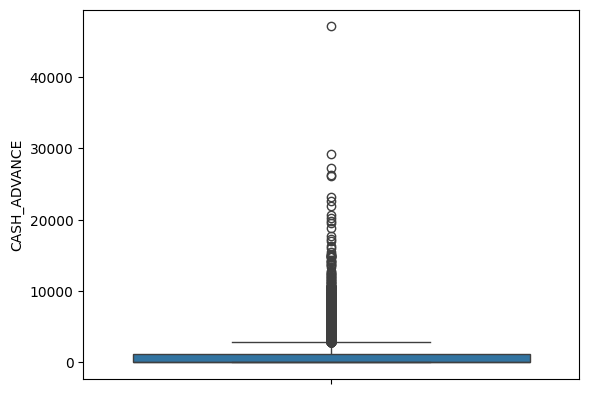

In [ ]:
sns.boxplot(CC_Dataset['CASH_ADVANCE'])

In [ ]:
CC_Dataset[CC_Dataset['CASH_ADVANCE']> 3300].shape

(811, 17)

<Axes: ylabel='PURCHASES_FREQUENCY'>

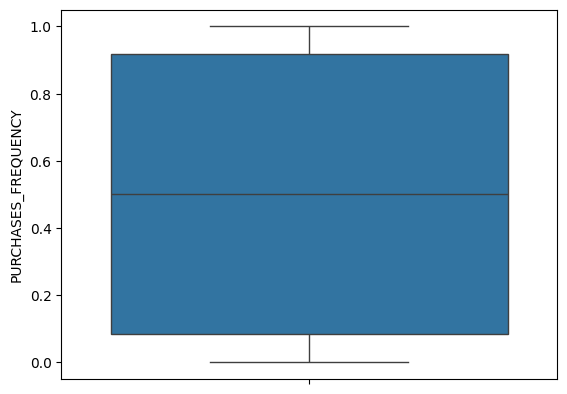

In [ ]:
sns.boxplot(CC_Dataset['PURCHASES_FREQUENCY'])

<Axes: ylabel='ONEOFF_PURCHASES_FREQUENCY'>

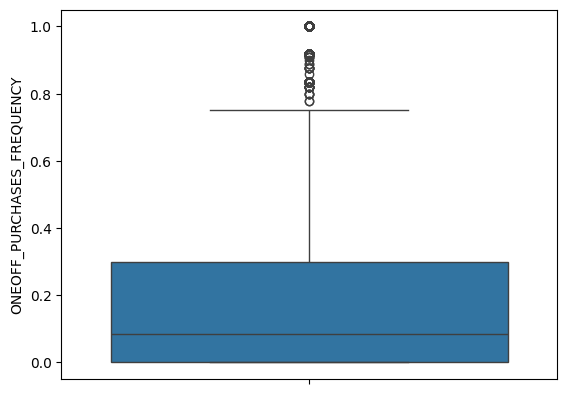

In [ ]:
sns.boxplot(CC_Dataset['ONEOFF_PURCHASES_FREQUENCY'])

In [ ]:

CC_Dataset[CC_Dataset['ONEOFF_PURCHASES_FREQUENCY']> 0.8].shape

(776, 17)

<Axes: ylabel='PURCHASES_INSTALLMENTS_FREQUENCY'>

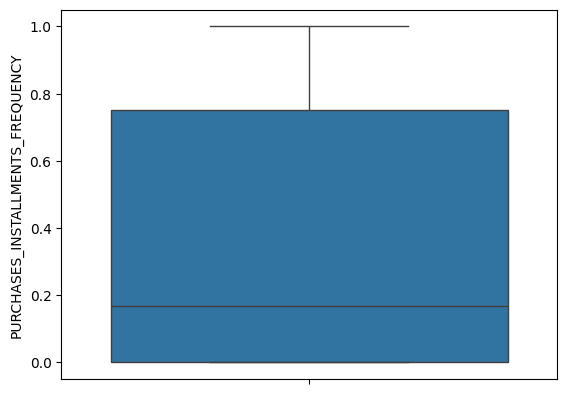

In [ ]:
sns.boxplot(CC_Dataset['PURCHASES_INSTALLMENTS_FREQUENCY'])

<Axes: ylabel='CASH_ADVANCE_FREQUENCY'>

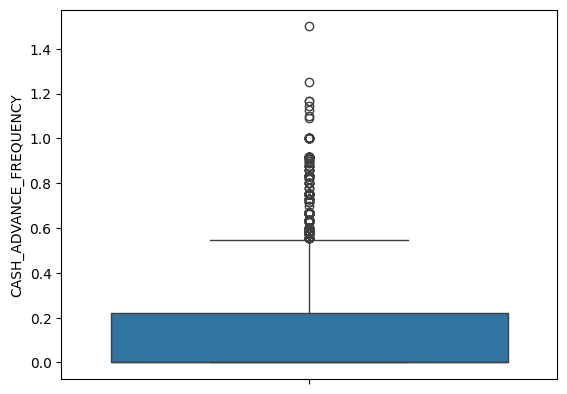

In [ ]:
sns.boxplot(CC_Dataset['CASH_ADVANCE_FREQUENCY'])

In [ ]:
CC_Dataset[CC_Dataset['CASH_ADVANCE_FREQUENCY']> 0.6].shape

(350, 17)

<Axes: ylabel='CASH_ADVANCE_TRX'>

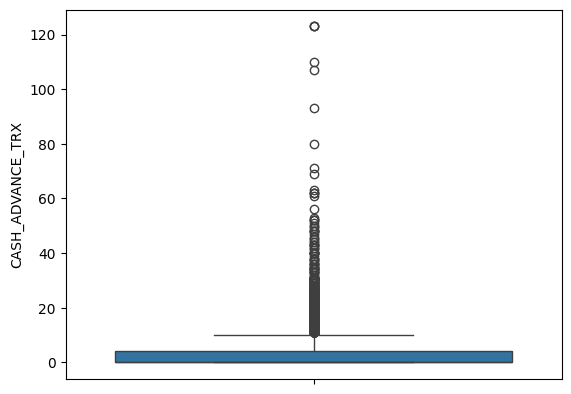

In [ ]:
sns.boxplot(CC_Dataset['CASH_ADVANCE_TRX'])

In [ ]:
CC_Dataset[CC_Dataset['CASH_ADVANCE_TRX']> 17].shape

(319, 17)

<Axes: ylabel='PURCHASES_TRX'>

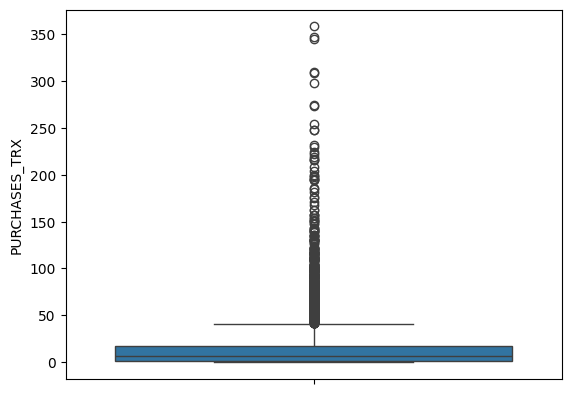

In [ ]:
sns.boxplot(CC_Dataset['PURCHASES_TRX'])

In [ ]:
CC_Dataset[CC_Dataset['PURCHASES_TRX']> 50].shape

(550, 17)

<Axes: ylabel='CREDIT_LIMIT'>

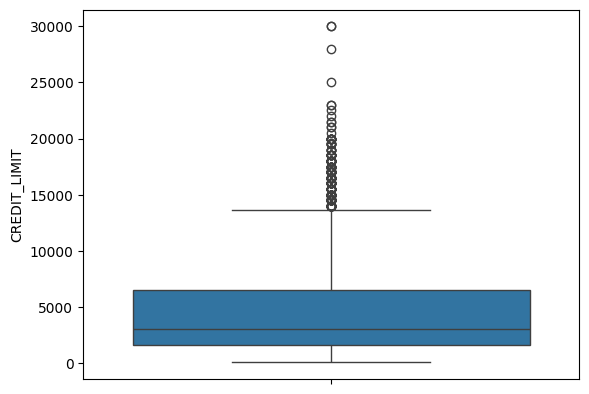

In [ ]:
sns.boxplot(CC_Dataset['CREDIT_LIMIT'])

In [ ]:
CC_Dataset[CC_Dataset['CREDIT_LIMIT']> 15000].shape

(152, 17)

<Axes: ylabel='PAYMENTS'>

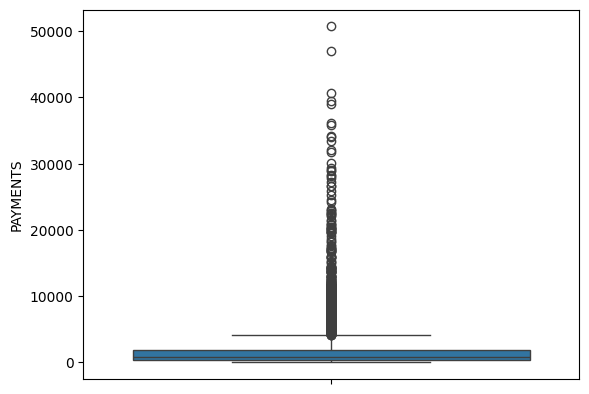

In [ ]:
sns.boxplot(CC_Dataset['PAYMENTS'])

In [ ]:
CC_Dataset[CC_Dataset['PAYMENTS']> 10000].shape

(171, 17)

<Axes: ylabel='MINIMUM_PAYMENTS'>

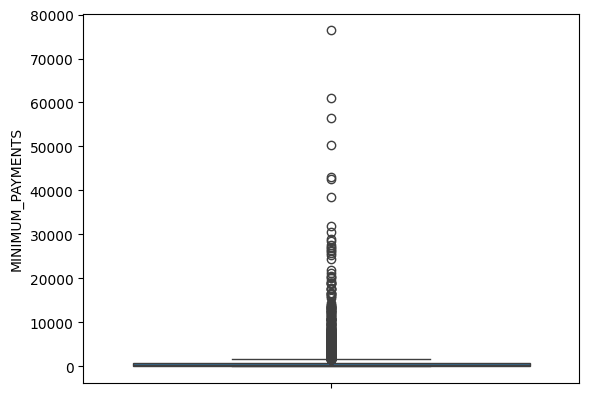

In [ ]:
sns.boxplot(CC_Dataset['MINIMUM_PAYMENTS'])

In [ ]:
CC_Dataset[CC_Dataset['MINIMUM_PAYMENTS']> 2000].shape

(710, 17)

<Axes: ylabel='PRC_FULL_PAYMENT'>

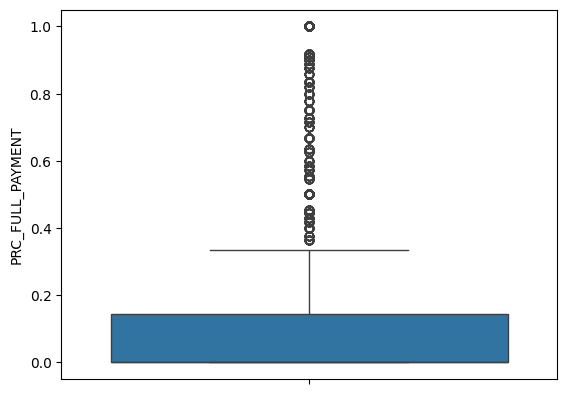

In [ ]:
sns.boxplot(CC_Dataset['PRC_FULL_PAYMENT'])

In [ ]:
CC_Dataset[CC_Dataset['PRC_FULL_PAYMENT']> 0.7].shape

(883, 17)

<Axes: ylabel='TENURE'>

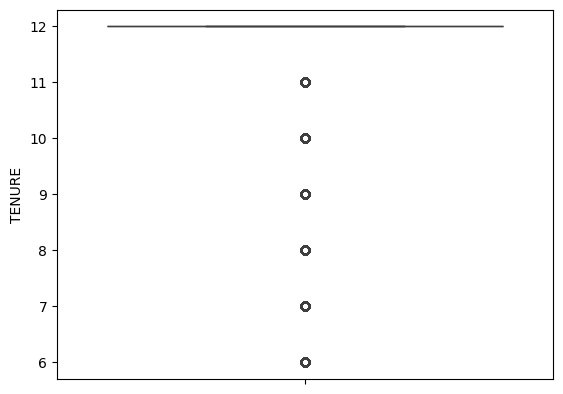

In [ ]:
sns.boxplot(CC_Dataset['TENURE'])

In [ ]:
CC_Dataset[CC_Dataset['TENURE']< 10].shape

(765, 17)

####Visualization

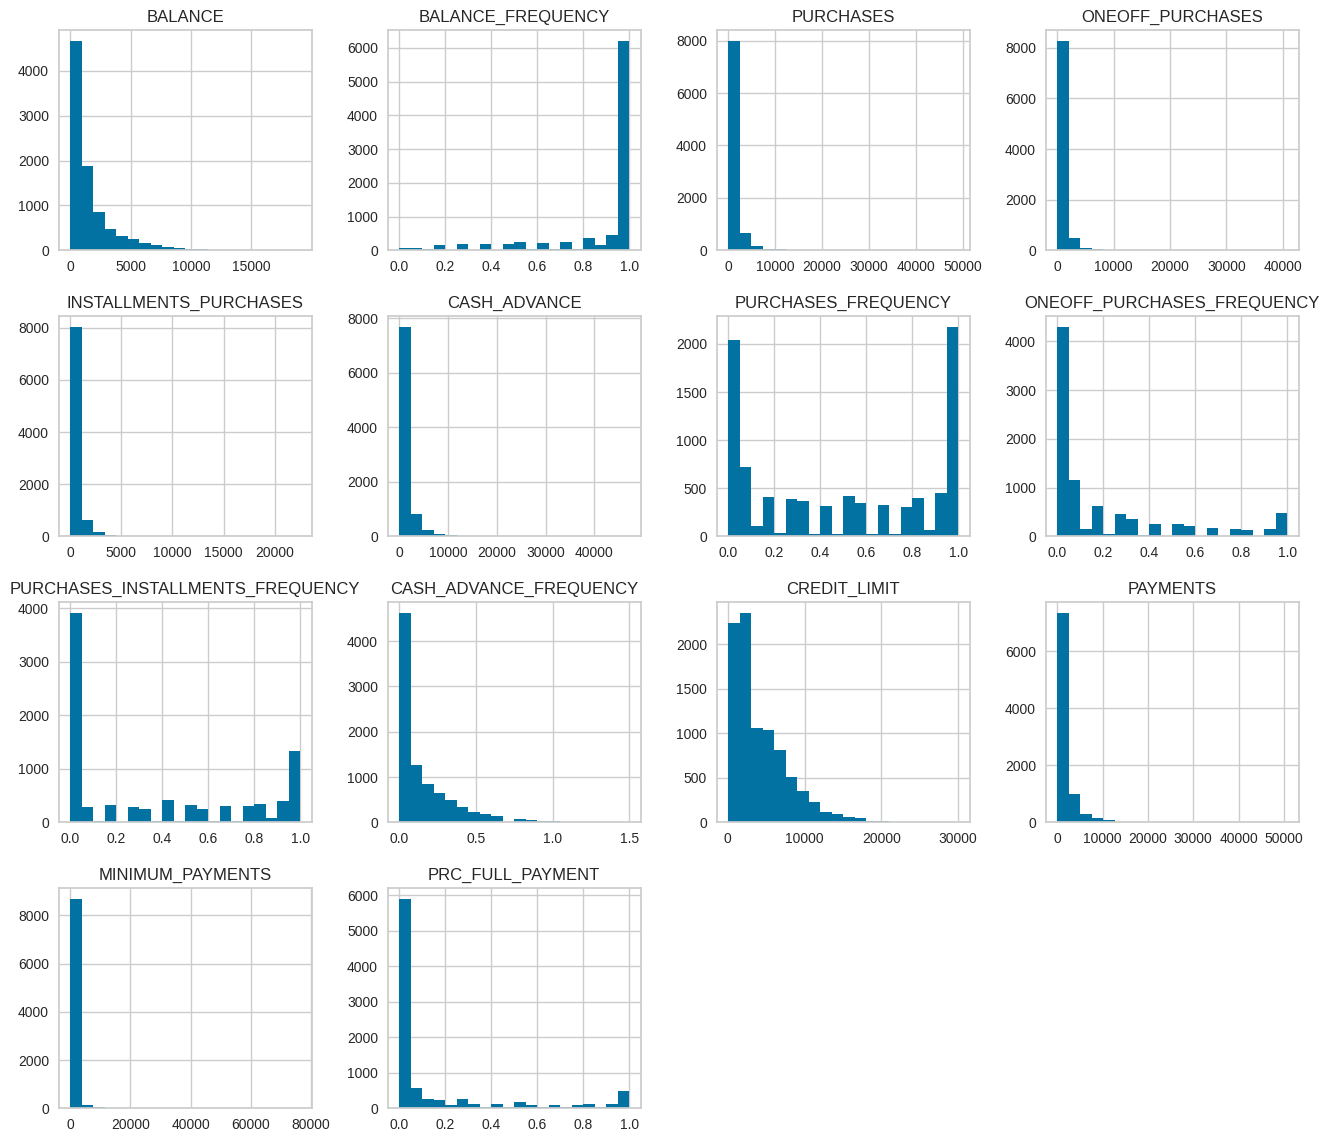

In [ ]:
CC_Dataset.select_dtypes(float).hist(figsize=(16, 14), bins=20);

####Scaling

In [ ]:

scaler = preprocessing.MinMaxScaler().fit(CC_Dataset)
data_scaled = scaler.transform(CC_Dataset)

#First experiment (using K-means)

####Performing PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
data_scaled_pca = pca.fit(data_scaled)

In [ ]:
explained_variance = pd.DataFrame([pca.explained_variance_ratio_, pca.explained_variance_ratio_.cumsum()]).T
explained_variance.columns = ['Exp Var', 'Cum Exp Var']
explained_variance

,Exp Var,Cum Exp Var
0,4.959709e-01,0.495971
1,1.405412e-01,0.636512
2,1.284461e-01,0.764958
3,7.676856e-02,0.841727
4,6.963555e-02,0.911362
5,3.588307e-02,0.947245
6,1.819258e-02,0.965438
7,1.352875e-02,0.978967
8,6.554854e-03,0.985522
9,5.508852e-03,0.991030


In [ ]:
pca = PCA(n_components=4)                # Compute PCA for 4 components
data_scaled_pca = pca.fit_transform(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

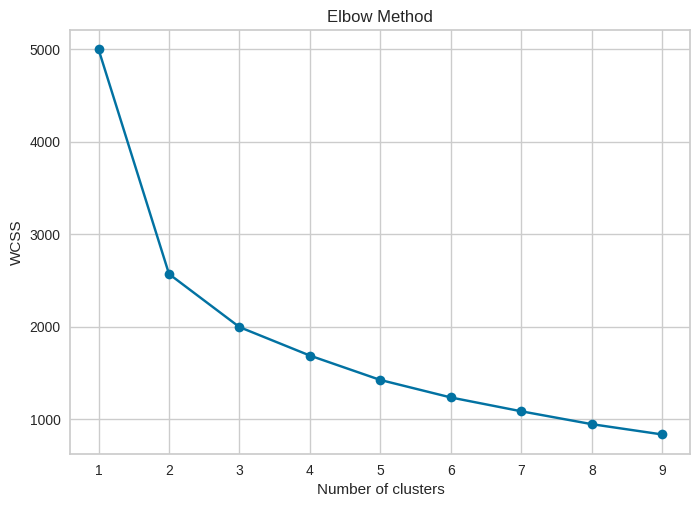

In [ ]:
from sklearn.cluster import KMeans

wcss = []                                                             # Create empty wcss list

for i in range(1, 10):                                                # Iterate through 11 clusters
    kmeans = KMeans(n_clusters=i)                                     # Apply kmeans clustering
    kmeans.fit(data_scaled_pca)
    wcss.append(kmeans.inertia_)                                      # Append wcss to wcss list

plt.plot(range(1, 10), wcss, '-o')                                    # Plot Elbow graph
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

####Performing Kmeans

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=4, random_state=0)
model.fit(data_scaled_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [ ]:
from numpy import unique

# assign a cluster to each example
yhat = model.predict(data_scaled_pca)
# retrieve unique clusters
clusters = unique(yhat)

In [ ]:
yhat.shape

(8950,)

In [ ]:
values, counts = np.unique(yhat, return_counts=True)

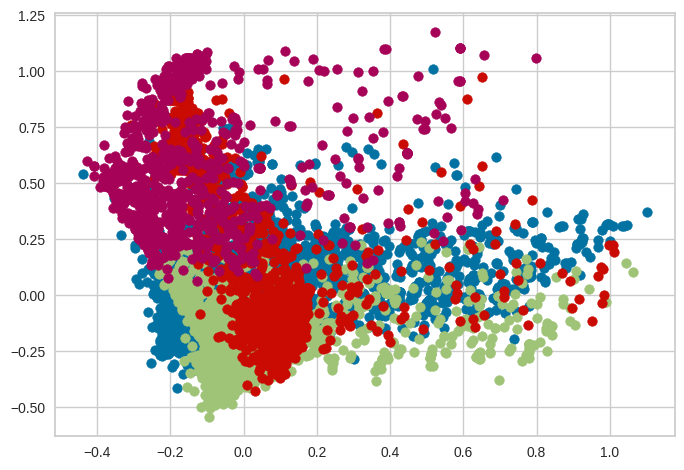

In [ ]:
from numpy import where

# create scatter plot for samples from each cluster
for cluster in clusters:
 # get row indexes for samples with this cluster
 row_ix = where(yhat == cluster)
 # create scatter of these samples
 plt.scatter(data_scaled_pca[row_ix, 3], data_scaled_pca[row_ix, 2])
# show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

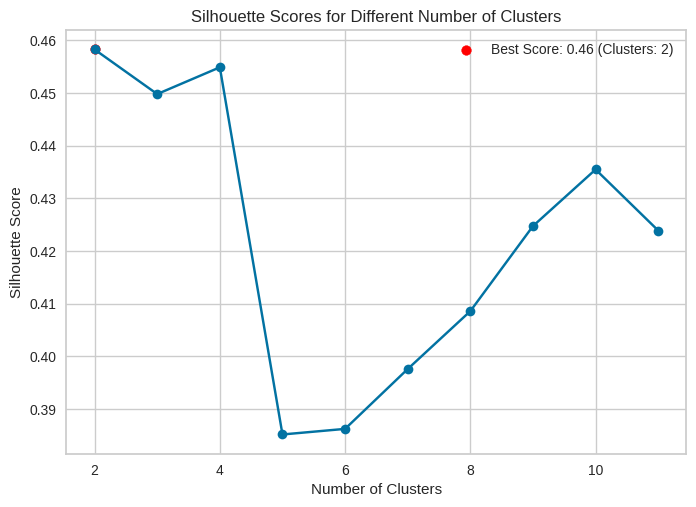

The best silhouette score is 0.46 for 2 clusters.


In [ ]:
from sklearn.metrics import silhouette_score

# Vary the number of clusters and calculate silhouette scores
n_clusters_range = range(2, 12)
silhouette_scores = []

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data_scaled_pca)
    silhouette_avg = silhouette_score(data_scaled_pca, labels)
    silhouette_scores.append(silhouette_avg)

# Find the best silhouette score and the corresponding number of clusters
best_score = max(silhouette_scores)
best_clusters = n_clusters_range[silhouette_scores.index(best_score)]

# Plot the silhouette scores
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.scatter(best_clusters, best_score, color='red', label=f'Best Score: {best_score:.2f} (Clusters: {best_clusters})')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Number of Clusters')
plt.legend()
plt.show()

print(f"The best silhouette score is {best_score:.2f} for {best_clusters} clusters.")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


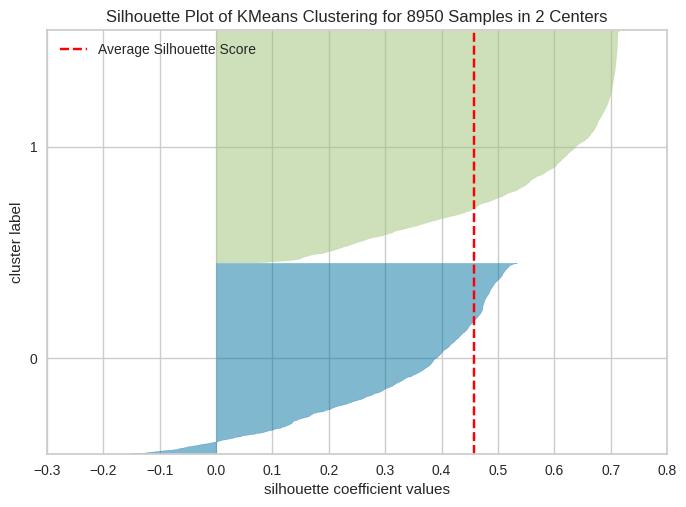

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


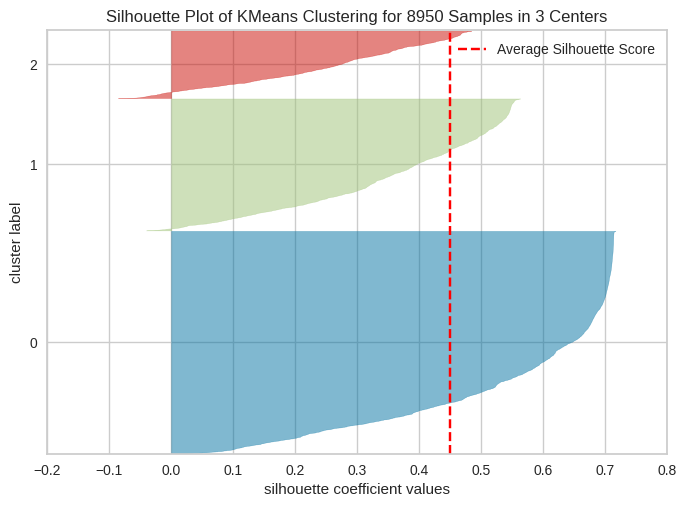

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


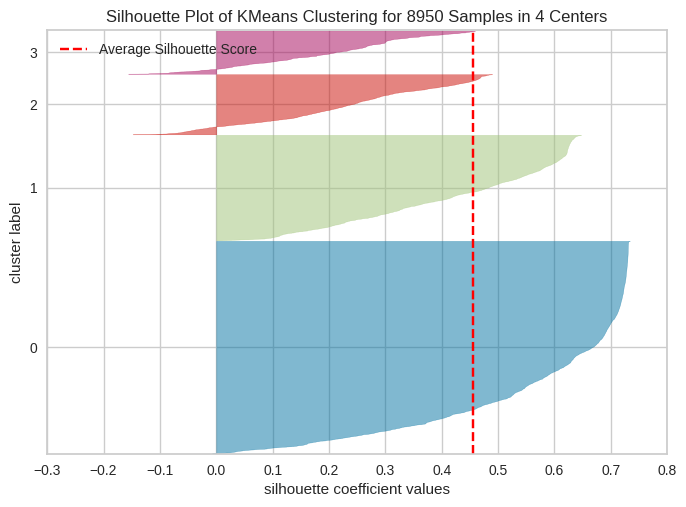

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


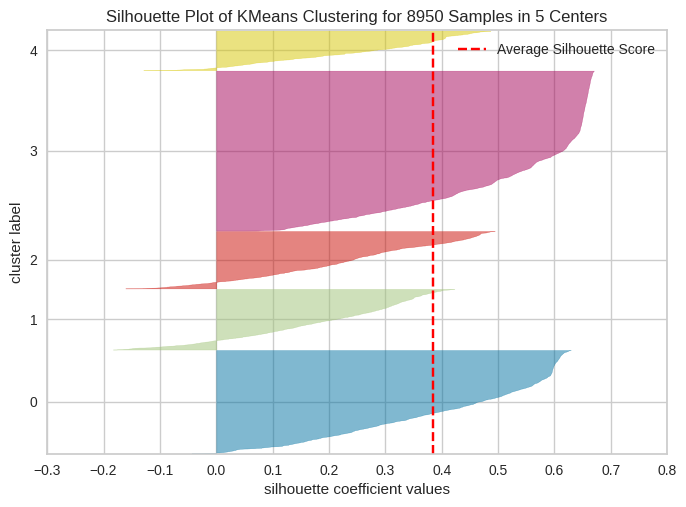

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


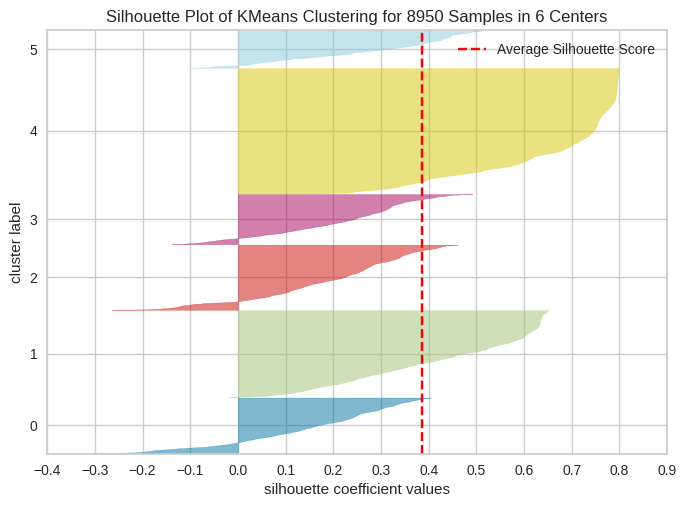

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


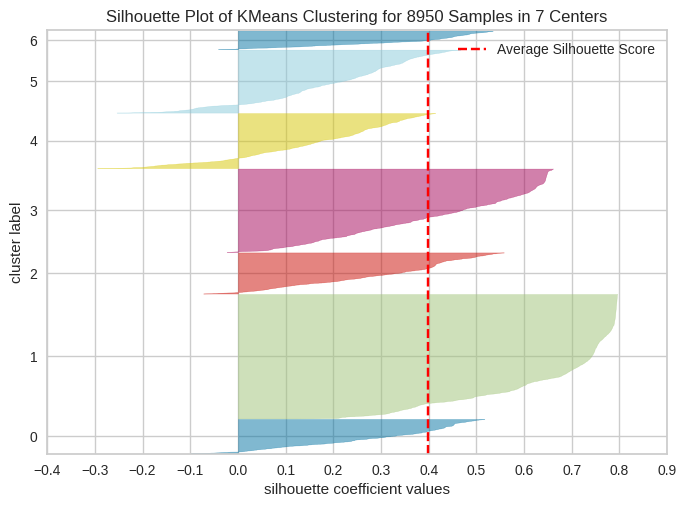

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


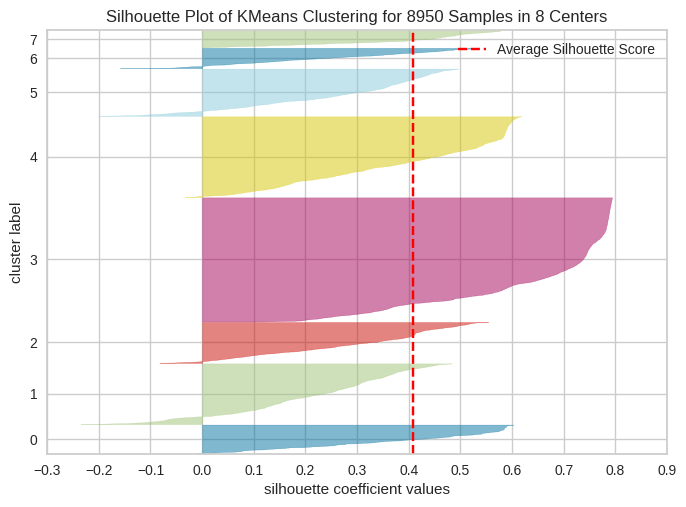

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


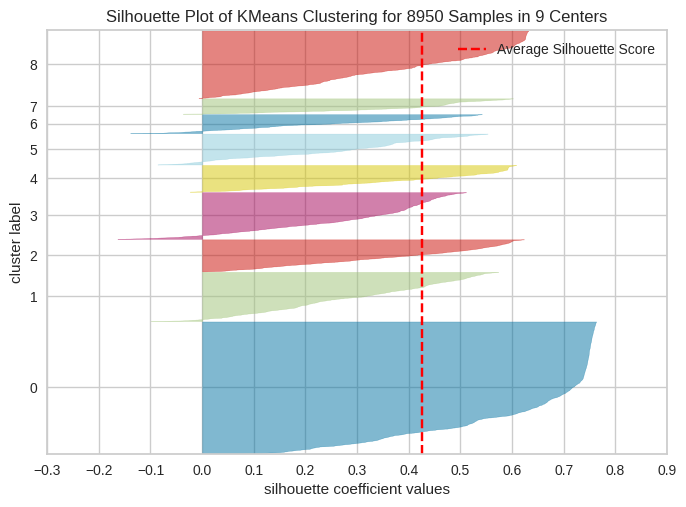

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
# Instantiate the clustering model and visualizer
for i in range (2,10):
  model = KMeans(i, random_state=42)
  visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

  visualizer.fit(data_scaled_pca)        # Fit the data to the visualizer
  visualizer.poof()        # Finalize an

In [ ]:
print("List of clusters",values)
print("Number of elements per cluster",counts)

List of clusters [0 1 2 3]
Number of elements per cluster [4516 2244 1276  914]


#Second experiment (using DBSCAN)

In [ ]:
def custom_describe(data):
    """
    Generate a custom description of a DataFrame including basic statistics,
    missing values count, unique values count, outliers count, and data types.

    Parameters:
    - data (pd.DataFrame): The pandas DataFrame to be described.

    Returns:
    pd.DataFrame: A custom description DataFrame with the following columns:
    - data_type: Data types for each column.
    - mean: Mean value for each numeric column.
    - std: Standard deviation for each numeric column.
    - missing_values: Count of missing values for each column.
    - unique_values: Count of unique values for each column.
    - outliers: Count of outliers for each numeric column.

    Example:
    custom_description = custom_describe(df)
    """

    # Basic statistics
    desc_stats = data.describe()

    # Missing values count
    missing_values = data.isnull().sum()

    # Unique values count
    unique_values = data.nunique()

    # Identify numeric columns
    numeric_cols = data.select_dtypes(include=['number']).columns

    # Calculate IQR and identify outliers for each numeric column
    outliers = {}
    for col in numeric_cols:
        q1 = desc_stats.loc['25%', col]
        q3 = desc_stats.loc['75%', col]
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers[col] = ((data[col] < lower_bound) | (data[col] > upper_bound)).sum()

    # Get data types for each column
    data_types = data.dtypes

    # Combine all information
    custom_description = pd.DataFrame({
        'data_type': data_types,
        'mean': desc_stats.loc['mean'],
        'std': desc_stats.loc['std'],
        'missing_values': missing_values,
        'unique_values': unique_values,
        'outliers': outliers
    })

    return custom_description

In [ ]:
custom_describe(CC_Dataset)

,data_type,mean,std,missing_values,unique_values,outliers
BALANCE,float64,1564.474828,2081.531879,0,8871,695
BALANCE_FREQUENCY,float64,0.877271,0.236904,0,43,1493
PURCHASES,float64,1003.204834,2136.634782,0,6203,808
ONEOFF_PURCHASES,float64,592.437371,1659.887917,0,4014,1013
INSTALLMENTS_PURCHASES,float64,411.067645,904.338115,0,4452,867
CASH_ADVANCE,float64,978.871112,2097.163877,0,4323,1030
PURCHASES_FREQUENCY,float64,0.490351,0.401371,0,47,0
ONEOFF_PURCHASES_FREQUENCY,float64,0.202458,0.298336,0,47,782
PURCHASES_INSTALLMENTS_FREQUENCY,float64,0.364437,0.397448,0,47,0
CASH_ADVANCE_FREQUENCY,float64,0.135144,0.200121,0,54,525


In [ ]:
import statsmodels.api as sm # for QQ Plot

def transform_qq(col):
    """
    Visualize the distribution of a numeric column through various transformations
    and their corresponding Q-Q plots.

    Parameters:
    - col (pd.Series): A pandas Series representing the numeric column to be visualized.

    Returns:
    None

    Plots:
    - Original histogram and Q-Q plot
    - Log transformation histogram and Q-Q plot
    - Square root transformation histogram and Q-Q plot
    - Cube root transformation histogram and Q-Q plot

    Example:
    transform_qq(df['BALANCE'])
    """

    # Transformations
    log_transformed = np.log1p(col)
    sqrt_transformed = np.sqrt(col)
    cbrt_transformed = np.cbrt(col)

    # Plot histograms and Q-Q plots
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))

    # Original Histogram
    axes[0, 0].hist(col, bins=20, color='blue', alpha=0.7)
    axes[0, 0].set_title(f'Original {col.name}')

    # Original Q-Q Plot
    sm.qqplot(col, line='s', ax=axes[1, 0])
    axes[1, 0].set_title(f'Original {col.name} Q-Q Plot')

    # Log Transformation Histogram
    axes[0, 1].hist(log_transformed, bins=20, color='green', alpha=0.7)
    axes[0, 1].set_title('Log Transformation')

    # Log Transformation Q-Q Plot
    sm.qqplot(log_transformed, line='s', ax=axes[1, 1])
    axes[1, 1].set_title('Log Transformation Q-Q Plot')

    # Square Root Transformation Histogram
    axes[0, 2].hist(sqrt_transformed, bins=20, color='orange', alpha=0.7)
    axes[0, 2].set_title('Square Root Transformation')

    # Square Root Transformation Q-Q Plot
    sm.qqplot(sqrt_transformed, line='s', ax=axes[1, 2])
    axes[1, 2].set_title('Square Root Transformation Q-Q Plot')

    # Cube Root Transformation Histogram
    axes[0, 3].hist(cbrt_transformed, bins=20, color='purple', alpha=0.7)
    axes[0, 3].set_title('Cube Root Transformation')

    # Cube Root Transformation Q-Q Plot
    sm.qqplot(cbrt_transformed, line='s', ax=axes[1, 3])
    axes[1, 3].set_title('Cube Root Transformation Q-Q Plot')

    plt.tight_layout()
    plt.show()

A **Quantile-Quantile** (Q-Q) plot is a graphical tool used to assess whether a given sample or dataset follows a specific theoretical distribution, such as a normal distribution. The primary use of Q-Q plots is to visually compare the quantiles of the observed data with the quantiles of the expected distribution.

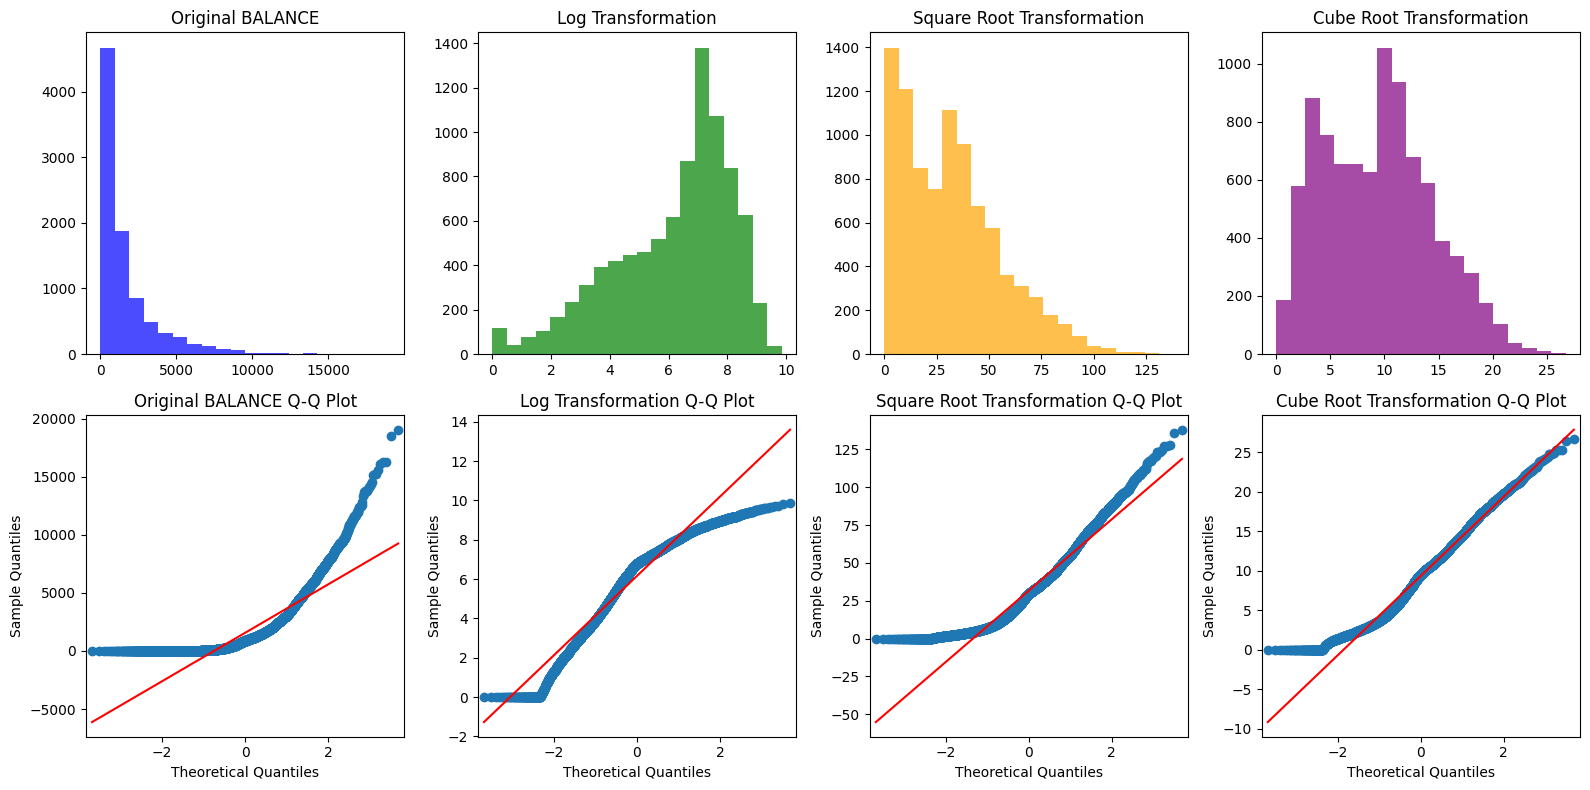

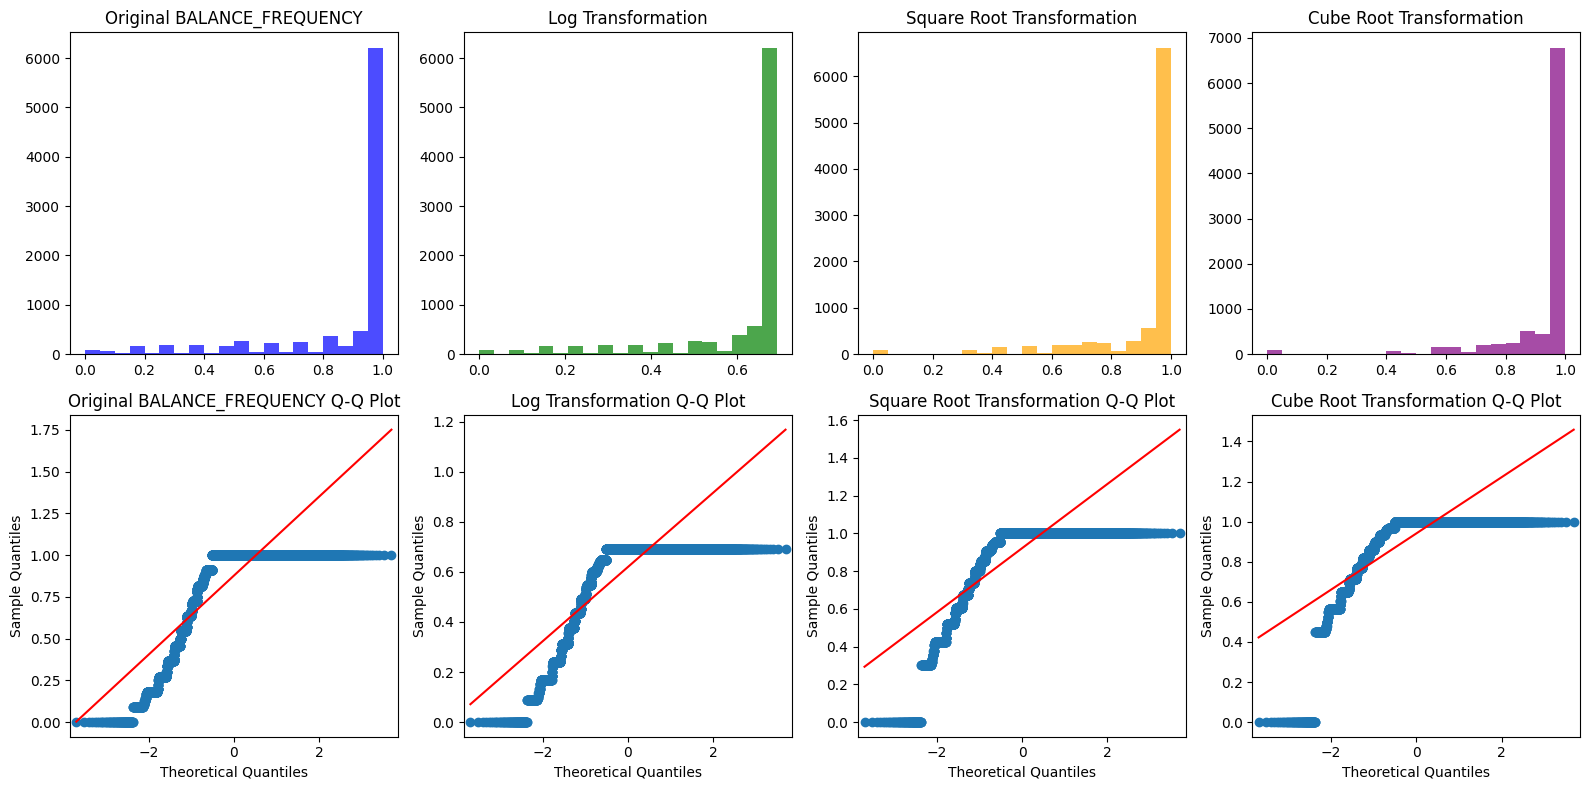

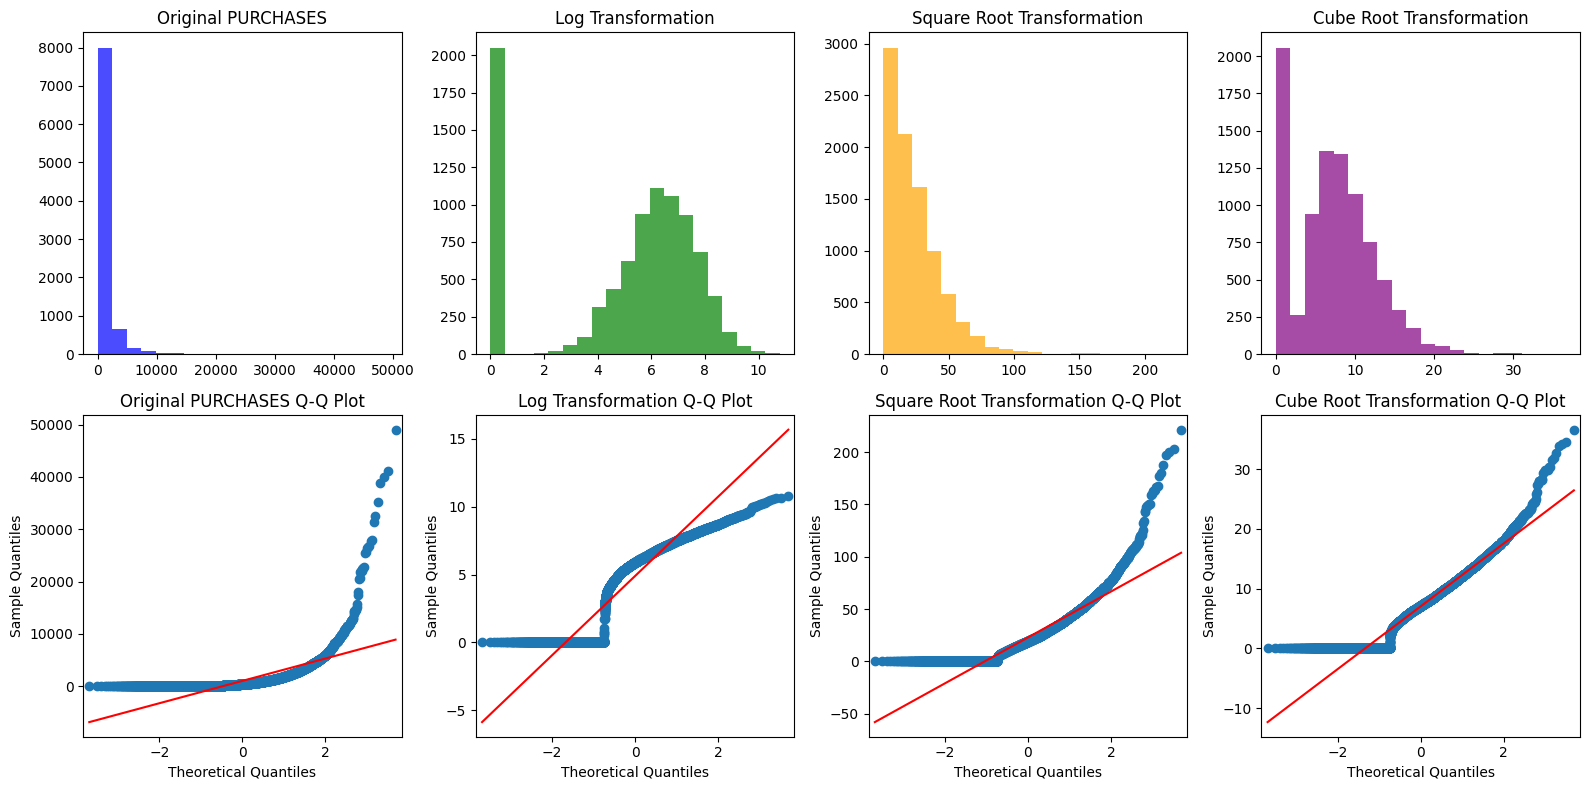

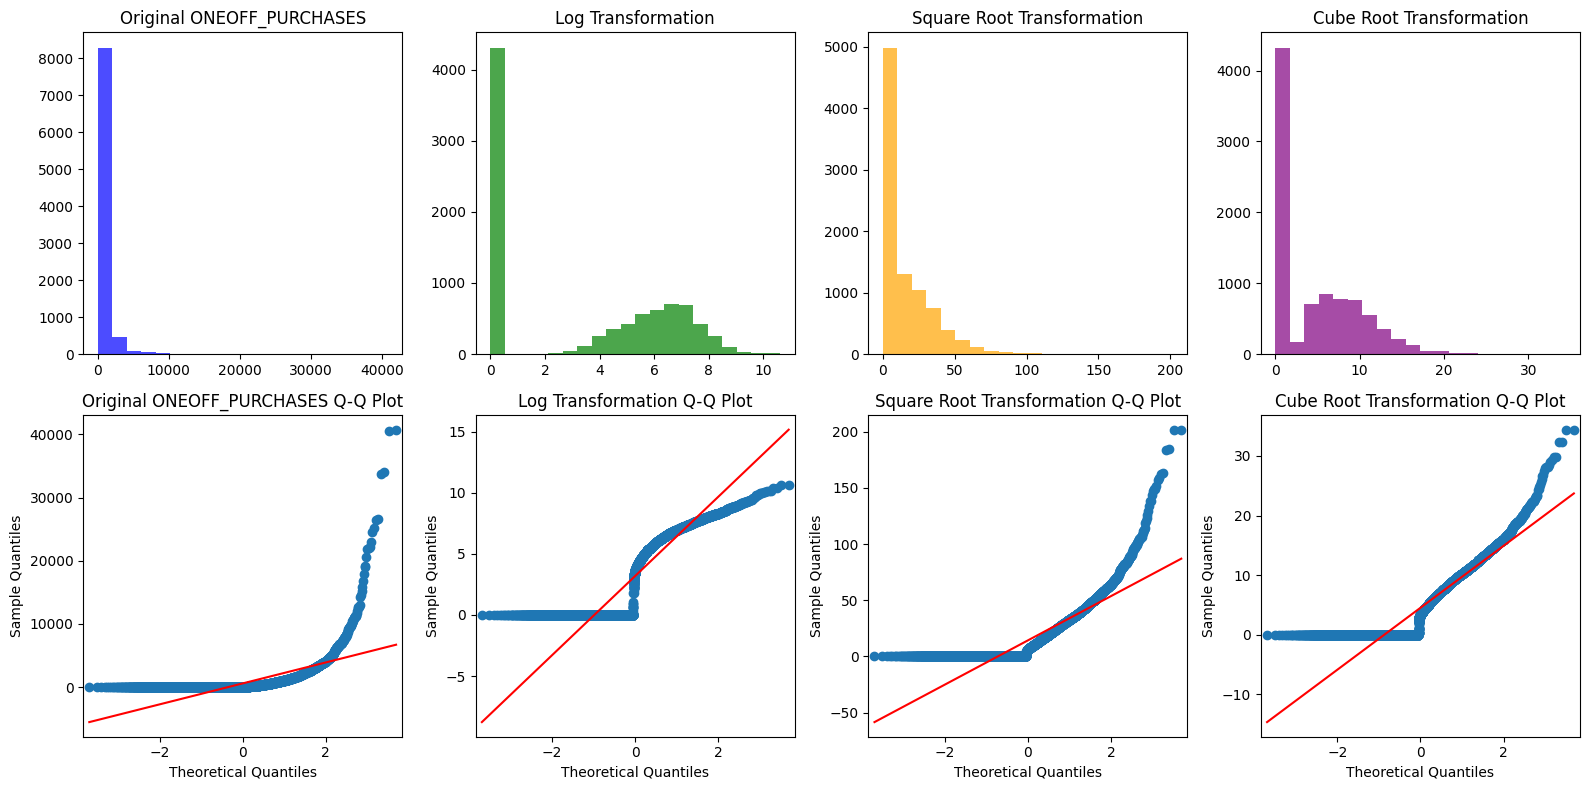

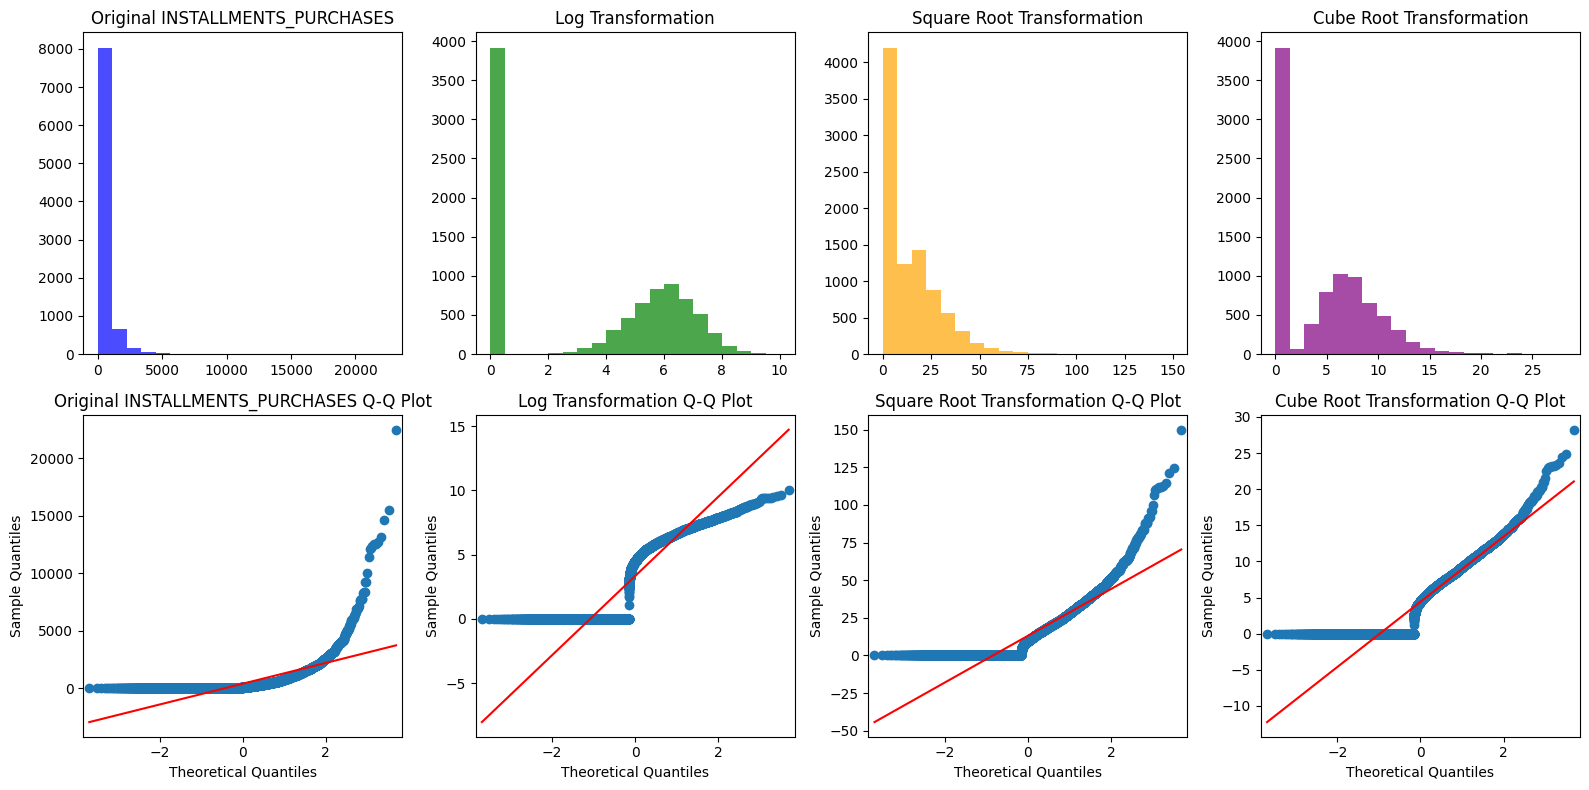

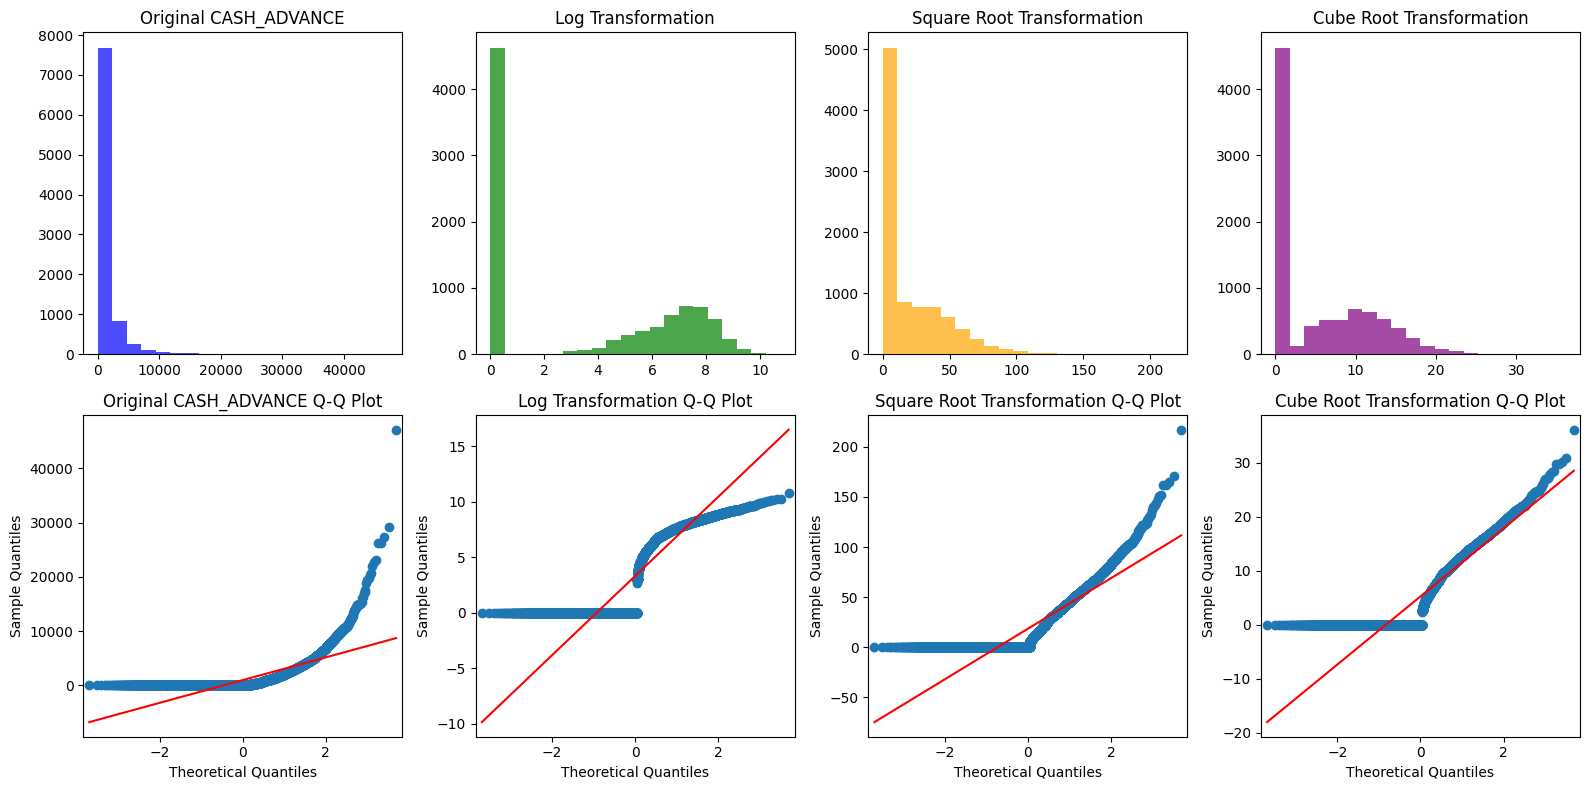

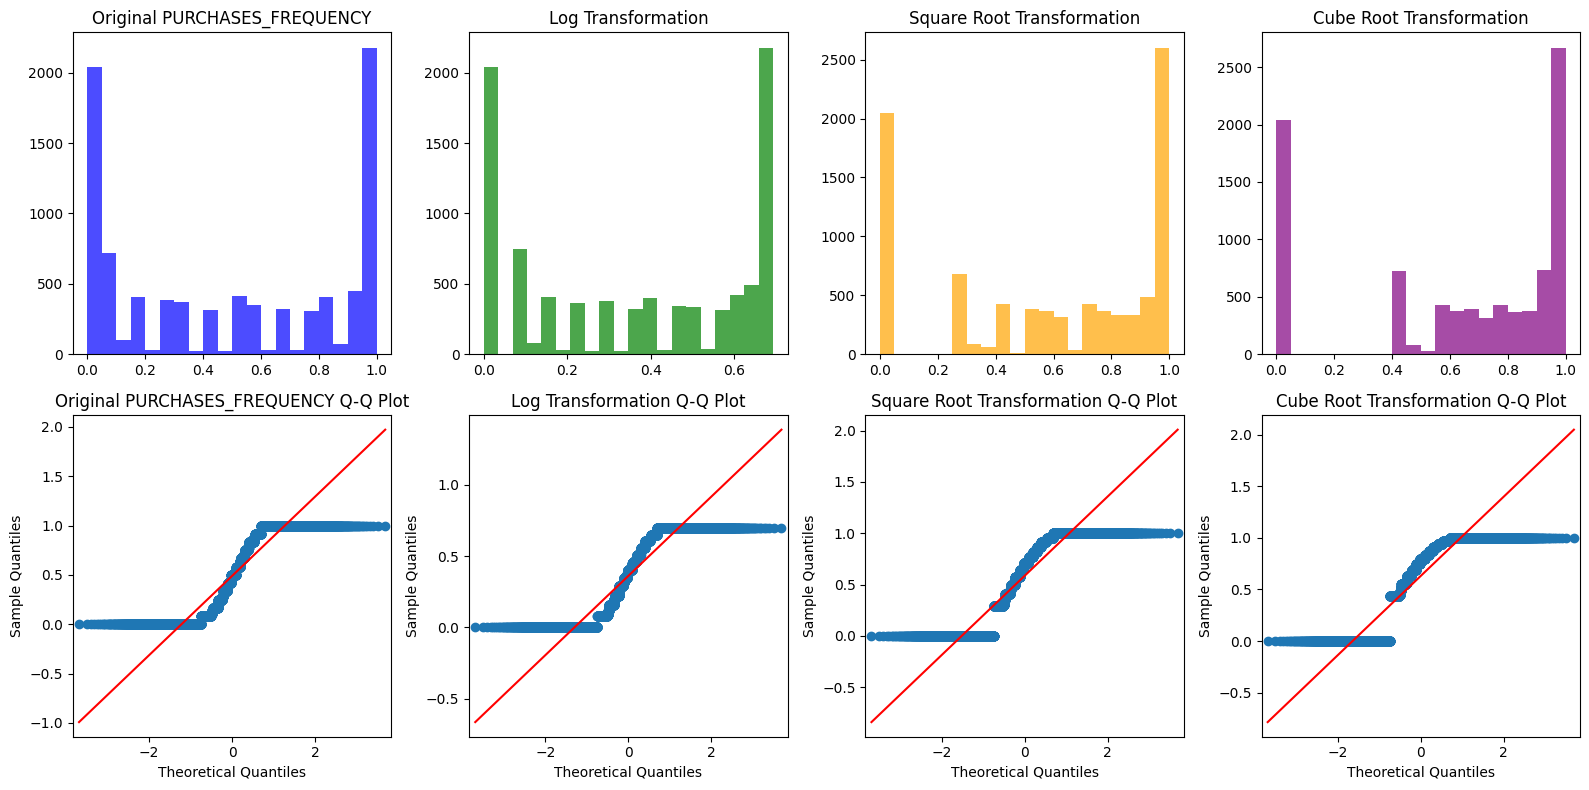

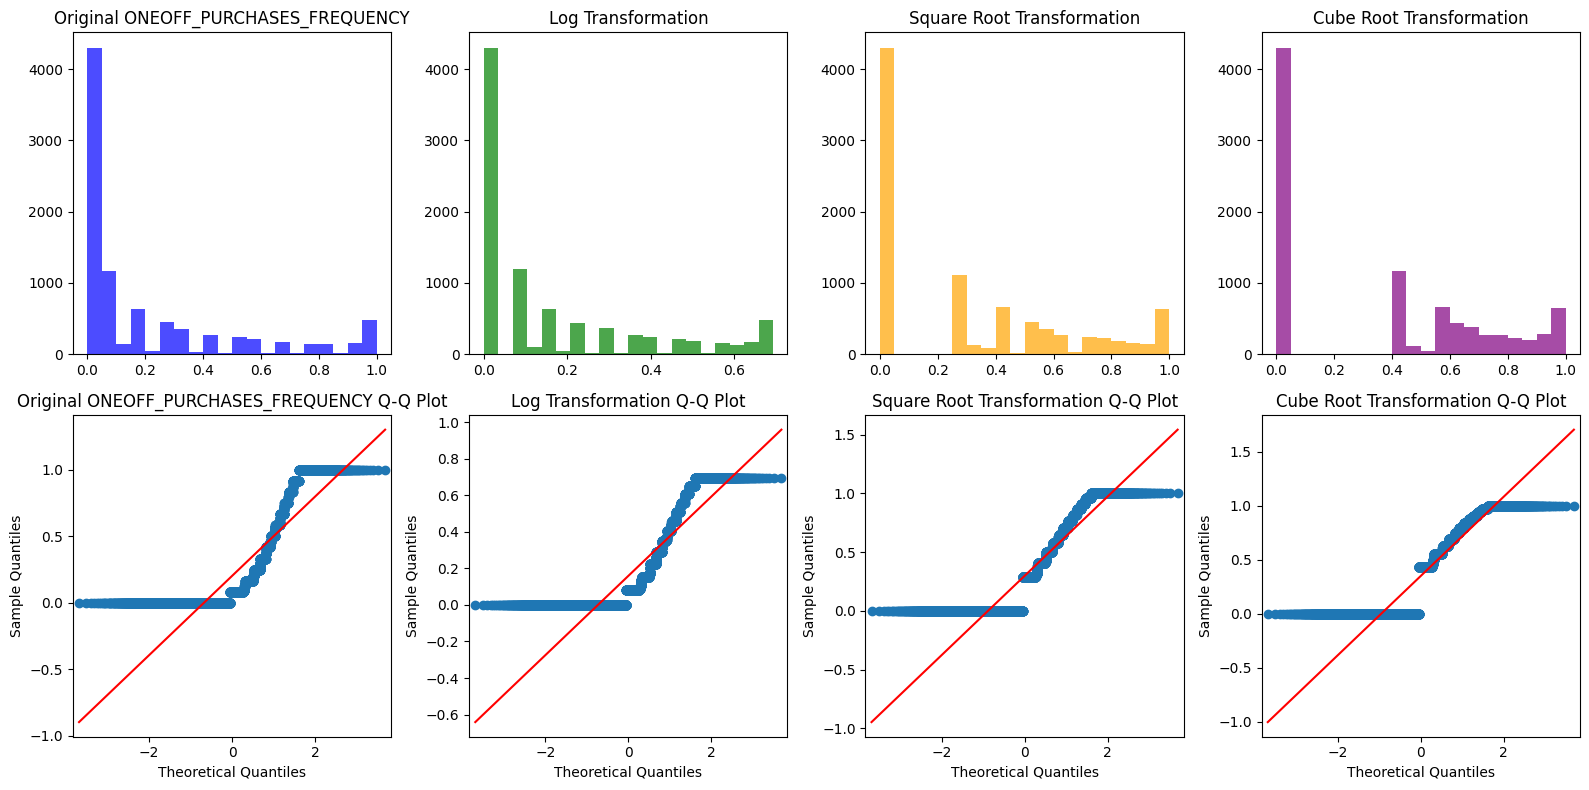

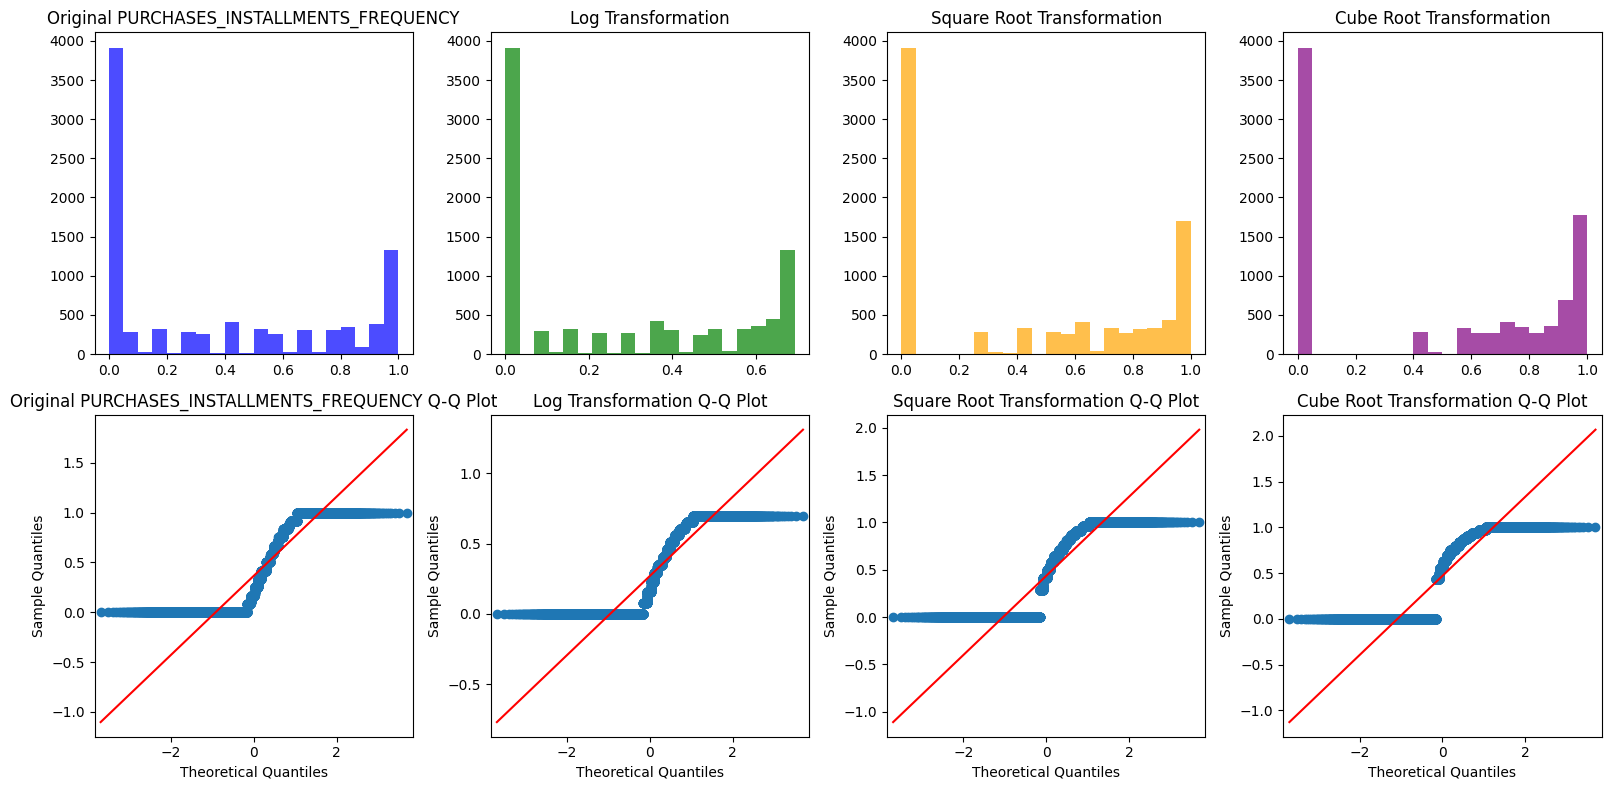

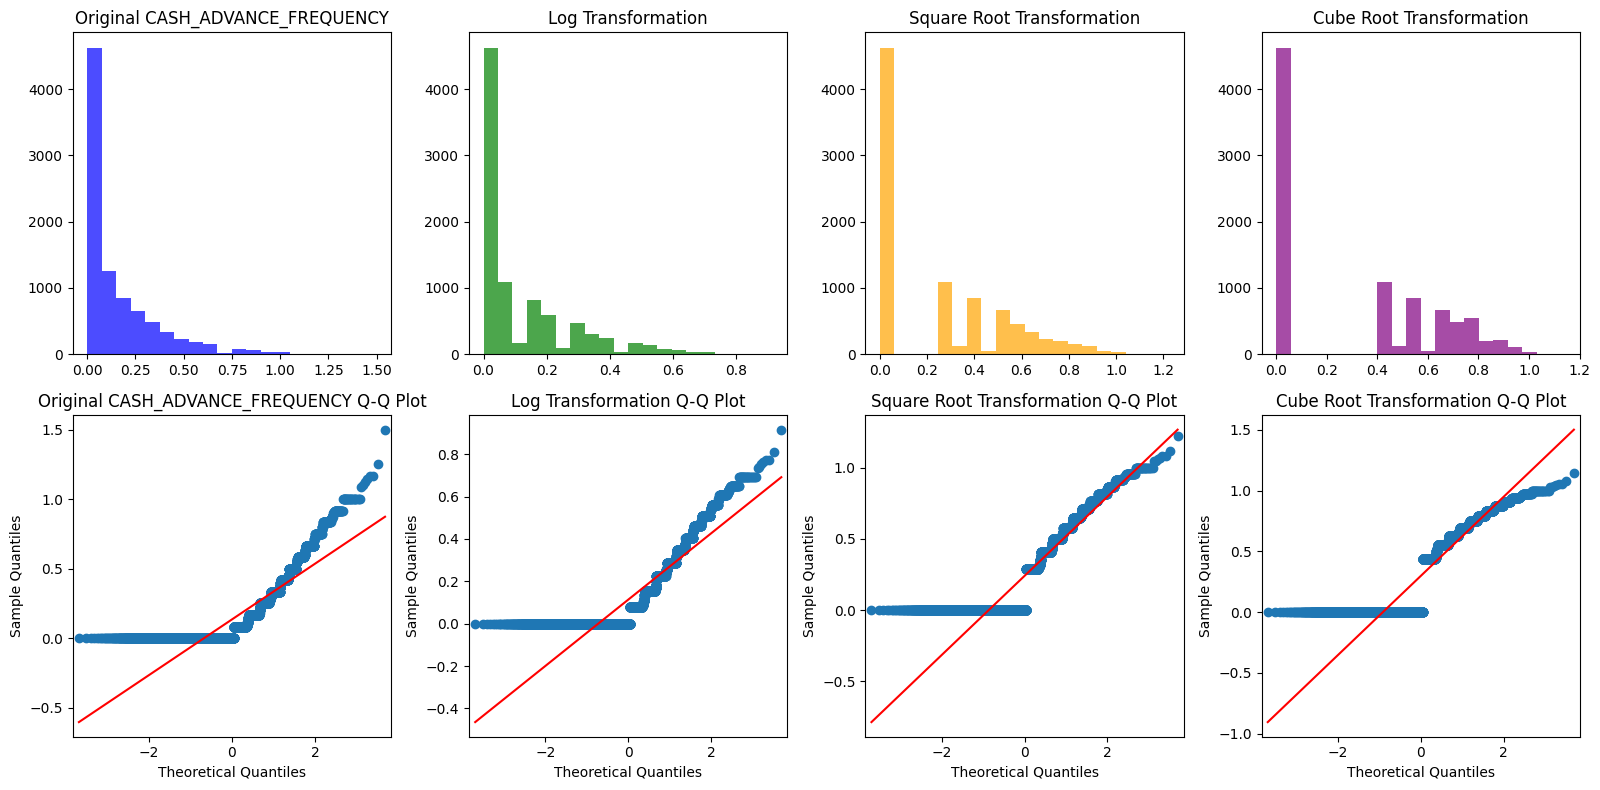

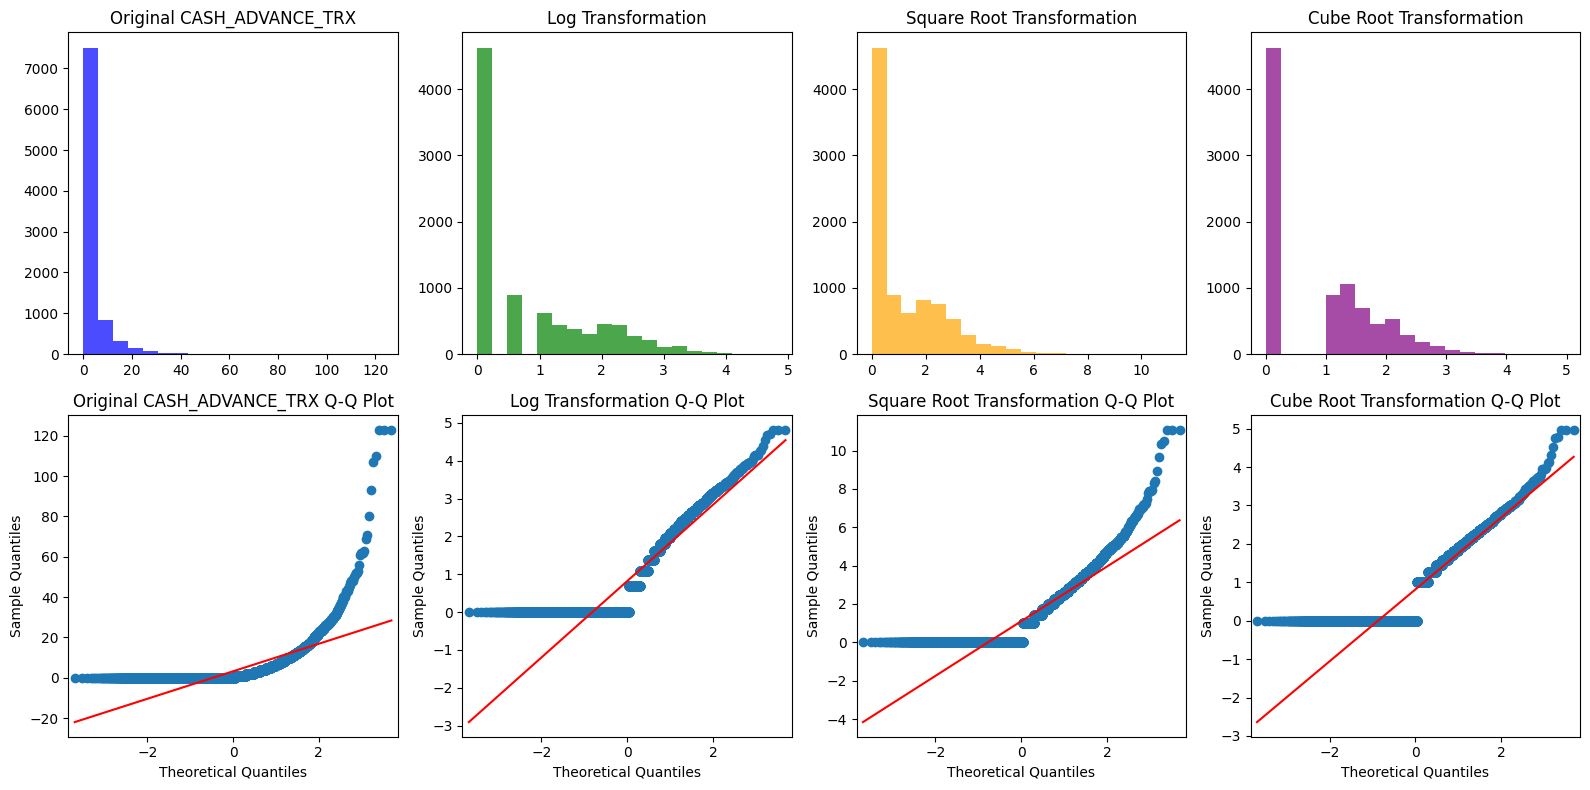

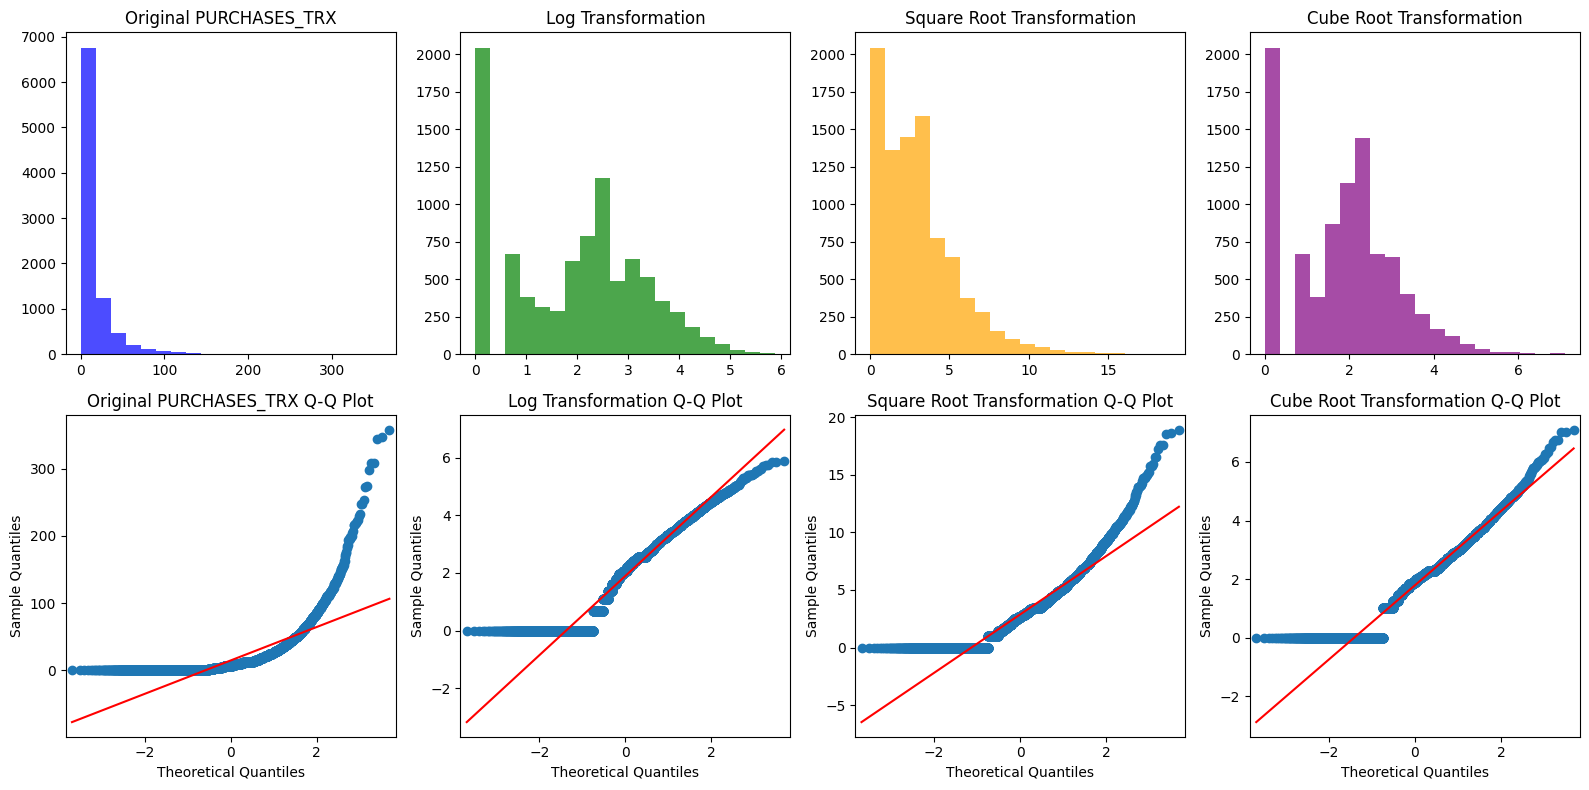

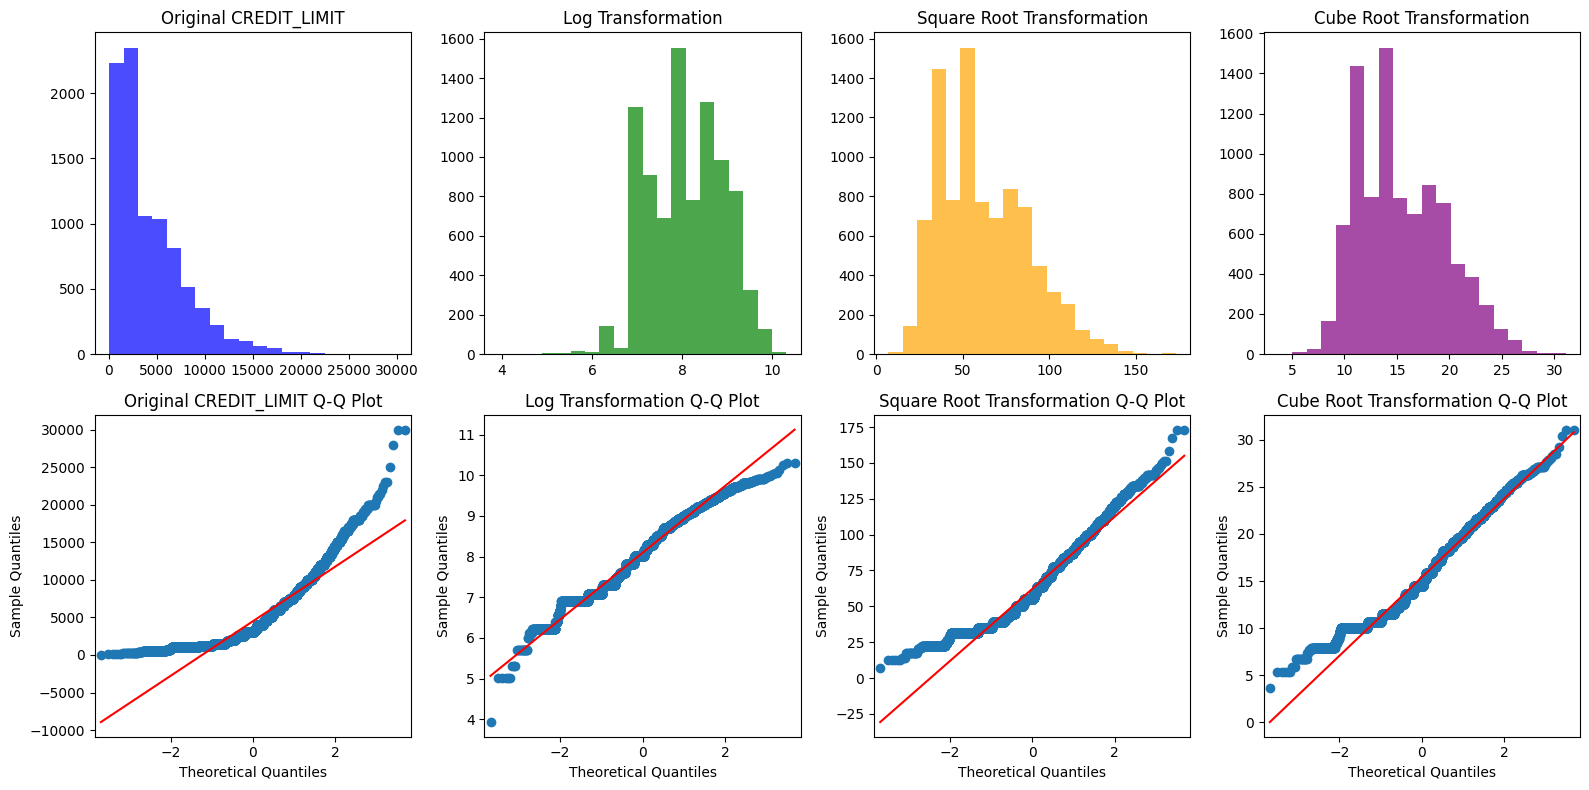

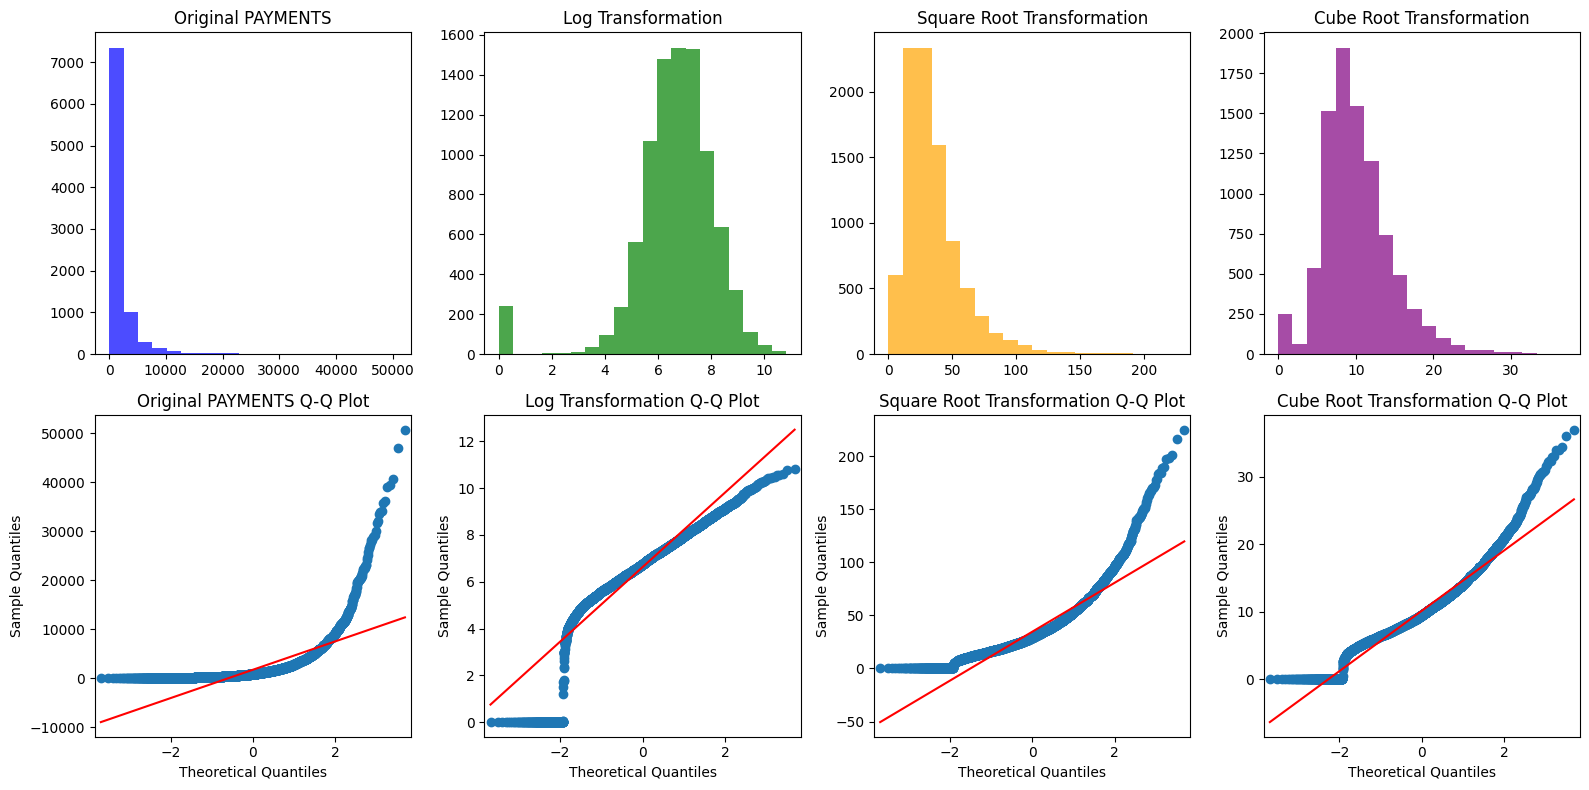

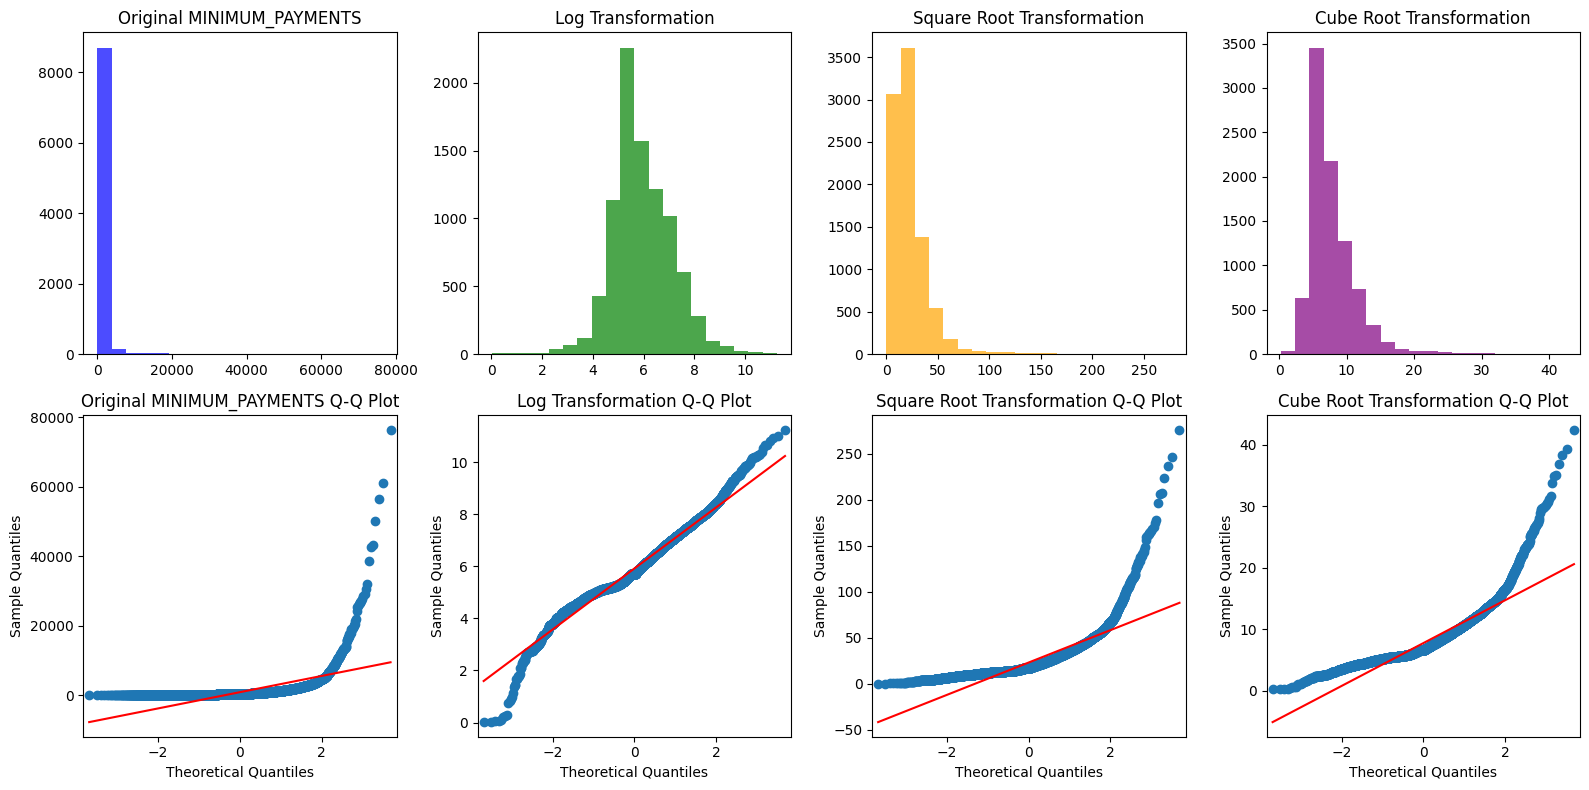

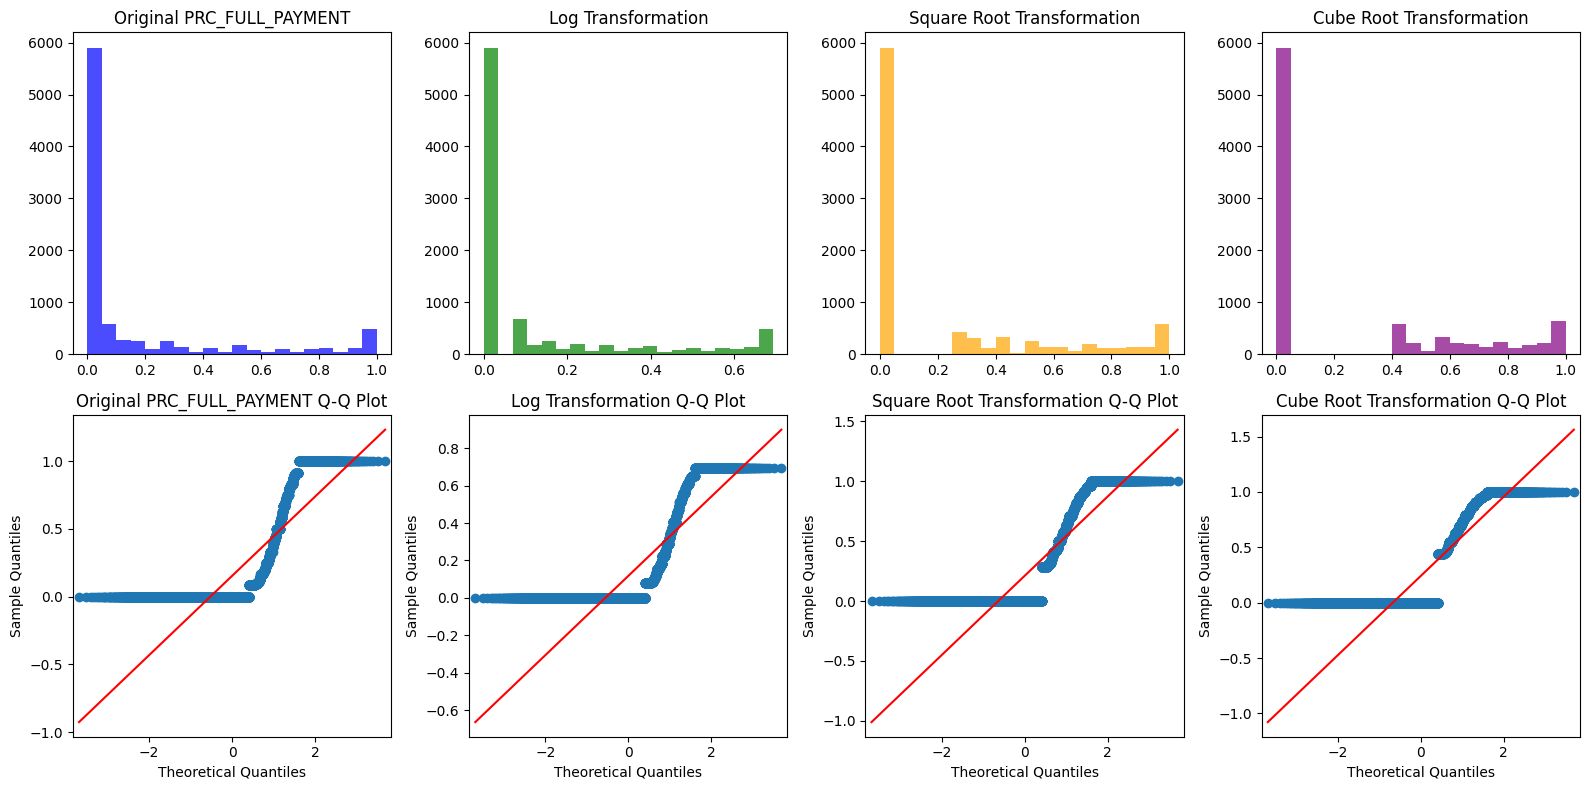

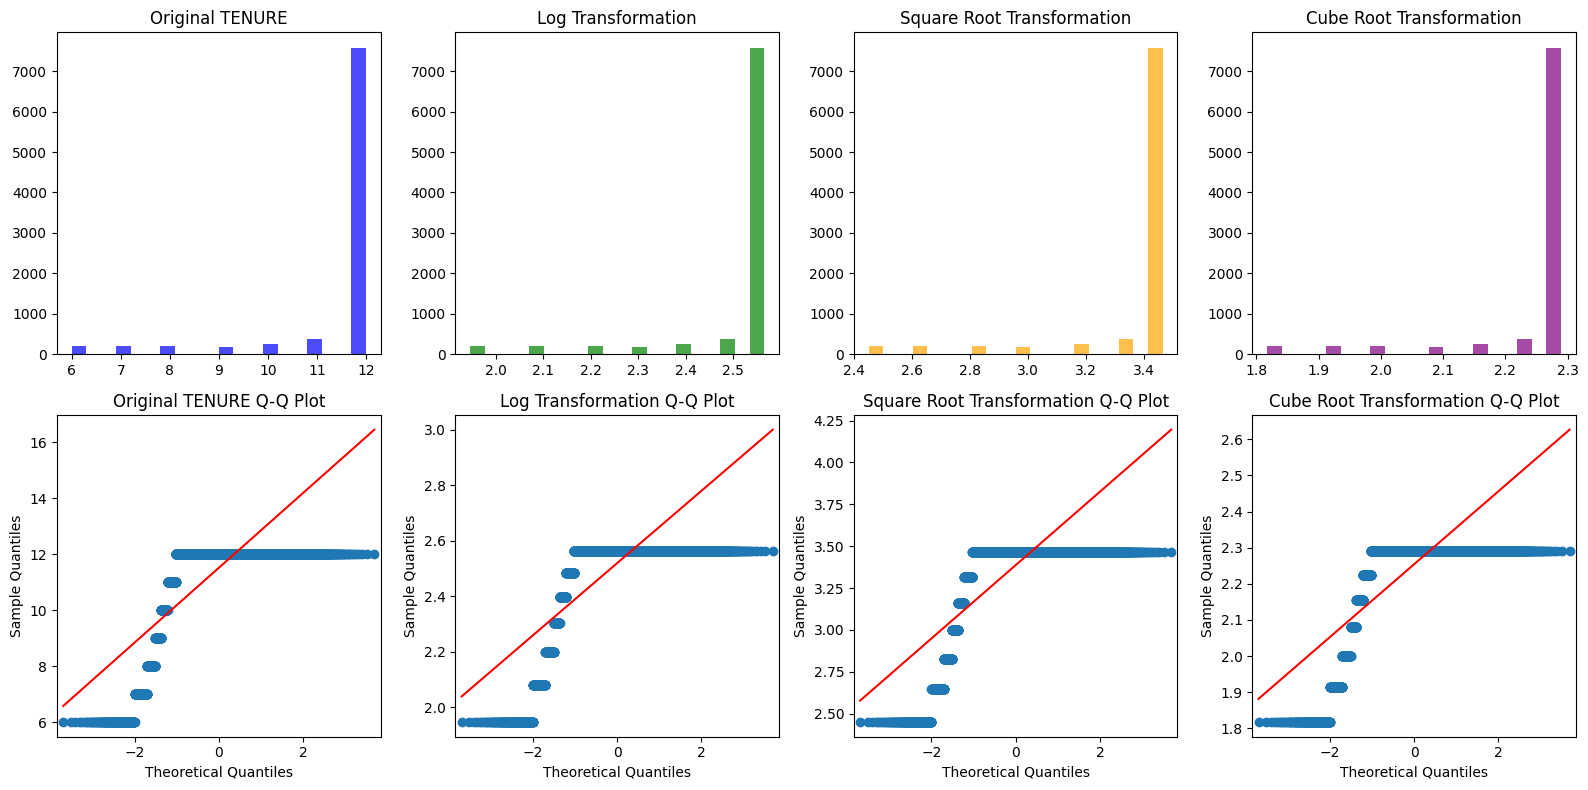

In [ ]:
for col in CC_Dataset.columns:
    transform_qq(CC_Dataset[col])
    print("="*200)

How can i know the best plot?
- **Good Fit**: If the points closely follow the line of equality, the data is likely a good fit for a normal distribution.

- **Skewness or Kurtosis**: Curvature away from the line may indicate skewness or kurtosis, suggesting departures from normality.

- **Outliers**: Outliers in the tails can also be identified.

In [ ]:
def apply_transformation(df):
    df["BALANCE"] = np.cbrt(df["BALANCE"])
    df["PURCHASES"] = np.cbrt(df["PURCHASES"])
    df["ONEOFF_PURCHASES"] = np.cbrt(df["ONEOFF_PURCHASES"])
    df["INSTALLMENTS_PURCHASES"] = np.cbrt(df["INSTALLMENTS_PURCHASES"])
    df["CASH_ADVANCE"] = np.cbrt(df["CASH_ADVANCE"])
    df["CASH_ADVANCE_FREQUENCY"] = np.sqrt(df["CASH_ADVANCE_FREQUENCY"])
    df["CREDIT_LIMIT"] = np.cbrt(df["CREDIT_LIMIT"])
    df["PAYMENTS"] = np.cbrt(df["PAYMENTS"])
    df["MINIMUM_PAYMENTS"] = np.log1p(df["MINIMUM_PAYMENTS"])
    return df

CC_Dataset = apply_transformation(CC_Dataset)

In [ ]:
custom_describe(CC_Dataset)

,data_type,mean,std,missing_values,unique_values,outliers
BALANCE,float64,2.017712,0.452729,0,8871,92
BALANCE_FREQUENCY,float64,0.877271,0.236904,0,43,1493
PURCHASES,float64,1.578948,0.899706,0,6203,2049
ONEOFF_PURCHASES,float64,1.042298,1.027822,0,4014,0
INSTALLMENTS_PURCHASES,float64,1.099203,0.987747,0,4452,0
CASH_ADVANCE,float64,1.048042,1.107337,0,4323,0
PURCHASES_FREQUENCY,float64,0.490351,0.401371,0,47,0
ONEOFF_PURCHASES_FREQUENCY,float64,0.202458,0.298336,0,47,782
PURCHASES_INSTALLMENTS_FREQUENCY,float64,0.364437,0.397448,0,47,0
CASH_ADVANCE_FREQUENCY,float64,0.334883,0.357471,0,54,0


In [ ]:
scaled_df = MinMaxScaler().fit_transform(CC_Dataset)

In [ ]:
from sklearn.metrics import silhouette_score

def objective(trial):
    eps = trial.suggest_float('eps', 0.1, 10)
    min_samples = trial.suggest_int('min_samples', 10, 150)

    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(scaled_df)

    try:
        silhouette_avg = silhouette_score(scaled_df, labels)
    except ValueError:  # Silhouette score may raise a ValueError if there's only one cluster
        silhouette_avg = -1

    return silhouette_avg

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2024-02-10 08:46:51,608] A new study created in memory with name: no-name-8412e5be-2a66-4c5c-a490-3e3408e2382c
[I 2024-02-10 08:46:56,905] Trial 0 finished with value: -1.0 and parameters: {'eps': 2.0969938189797013, 'min_samples': 58}. Best is trial 0 with value: -1.0.
[I 2024-02-10 08:47:01,449] Trial 1 finished with value: -1.0 and parameters: {'eps': 4.564844551033752, 'min_samples': 12}. Best is trial 0 with value: -1.0.
[I 2024-02-10 08:47:04,234] Trial 2 finished with value: -1.0 and parameters: {'eps': 8.451075056531877, 'min_samples': 134}. Best is trial 0 with value: -1.0.
[I 2024-02-10 08:47:07,053] Trial 3 finished with value: -1.0 and parameters: {'eps': 6.764239813761273, 'min_samples': 63}. Best is trial 0 with value: -1.0.
[I 2024-02-10 08:47:10,141] Trial 4 finished with value: -1.0 and parameters: {'eps': 7.287878615860818, 'min_samples': 115}. Best is trial 0 with value: -1.0.
[I 2024-02-10 08:47:13,512] Trial 5 finished with value: -1.0 and parameters: {'eps': 5.

In [ ]:
best_eps = study.best_params['eps']
best_min_samples = study.best_params['min_samples']

print(f"Best parameters - eps: {best_eps}, min_samples: {best_min_samples}")

Best parameters - eps: 0.6259402322664313, min_samples: 22


In [ ]:
dbscan = DBSCAN(eps=0.62, min_samples=22)
labels = dbscan.fit_predict(scaled_df)

In [ ]:
silhouette_score(scaled_df, labels)

0.265171581749423

In [ ]:
values, counts = np.unique(labels, return_counts=True)

In [ ]:
print("List of clusters",values)
print("Number of elements per cluster",counts)

List of clusters [-1  0  1]
Number of elements per cluster [  43 4612 4295]
